In [24]:
import pandas as pd

file_path = '/kaggle/input/dataset/datset_final.xlsx'

try:
    df = pd.read_excel(file_path)
    number_of_duplicates = df.duplicated().sum()

    print(f"Dataset Shape: {df.shape}")
    print(f"Number of duplicate rows found: {number_of_duplicates}")

except FileNotFoundError:
    print(f"Error: The file was not found at the path: {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")


Dataset Shape: (382, 9)
Number of duplicate rows found: 0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pKa                     322 non-null    float64
 1   Particle size (mm)      337 non-null    float64
 2   Acid concentration (M)  326 non-null    float64
 3   Cu in feed (%)          263 non-null    float64
 4   Temperature (°C)        364 non-null    float64
 5   Leaching time (min)     360 non-null    float64
 6   Pulp density (g/L)      173 non-null    object 
 7   Agitation speed (rpm)   213 non-null    float64
 8   % Cu Recovery           377 non-null    object 
dtypes: float64(7), object(2)
memory usage: 27.0+ KB


In [28]:
import pandas as pd
import numpy as np

file_path = '/kaggle/input/dataset/datset_final.xlsx'

try:
    df = pd.read_excel(file_path)
    print("Original Data Types")
    df.info()
    print("\n" + "="*40 + "\n")

    cols_to_convert = ['Pulp density (g/L)', '% Cu Recovery']

    for col in cols_to_convert:
        print(f"--- Processing Column: '{col}' ---")

        numeric_series = pd.to_numeric(df[col], errors='coerce')

        problem_rows = df[df[col].notna() & numeric_series.isna()]

        if not problem_rows.empty:
            print(f"Found {len(problem_rows)} non-numeric value(s) in '{col}'.")
            print("Rows with discrepancies:")
            print(problem_rows[[col]])
            print("-" * 30)
        else:
            print(f"No discrepancies found in '{col}'. All values are numeric.")

        df[col] = numeric_series

    print("\n" + "="*40 + "\n")
    print("Data Types After Conversion")
    df.info()

except FileNotFoundError:
    print(f"Error: The file was not found at the path: {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Original Data Types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pKa                     322 non-null    float64
 1   Particle size (mm)      337 non-null    float64
 2   Acid concentration (M)  326 non-null    float64
 3   Cu in feed (%)          263 non-null    float64
 4   Temperature (°C)        364 non-null    float64
 5   Leaching time (min)     360 non-null    float64
 6   Pulp density (g/L)      173 non-null    object 
 7   Agitation speed (rpm)   213 non-null    float64
 8   % Cu Recovery           377 non-null    object 
dtypes: float64(7), object(2)
memory usage: 27.0+ KB


--- Processing Column: 'Pulp density (g/L)' ---
Found 5 non-numeric value(s) in 'Pulp density (g/L)'.
Rows with discrepancies:
    Pulp density (g/L)
128                NAN
129                NAN
130                NAN
131                

In [29]:
import pandas as pd
import numpy as np

file_path = '/kaggle/input/dataset/datset_final.xlsx'

try:
    df = pd.read_excel(file_path)
    print("1. Initial Data Check")
    print(f"Original shape: {df.shape}")
    print("Original data types:")
    print(df.dtypes.to_string())
    print("\n" + "="*40 + "\n")


    # 2. Custom Data Cleaning 
    # '<0.01' exists replacing with 0.
    if '% Cu Recovery' in df.columns:
        df['% Cu Recovery'] = df['% Cu Recovery'].replace('<0.01', 0.0)


    # 3. Convert Object Columns to Numeric 
    print(" 2. Converting Columns to Numeric ")
    cols_to_convert = ['Pulp density (g/L)', '% Cu Recovery']
    for col in cols_to_convert:
        if col in df.columns:
            # Convert to numeric, turning any remaining problems into NaN
            df[col] = pd.to_numeric(df[col], errors='coerce')

    print("Data types after conversion:")
    print(df.dtypes.to_string())
    print("\n" + "="*40 + "\n")


    # 4. Summarize Missing Values 
    print("3. Missing Values Summary")
    # Calculate the number of missing values in each column
    missing_values = df.isnull().sum()
    # Filter to show only columns that actually have missing values
    missing_values = missing_values[missing_values > 0]

    if not missing_values.empty:
        print("Total missing values per column:")
        print(missing_values.to_string())
    else:
        print("No missing values found in the dataset.")


except FileNotFoundError:
    print(f"Error: The file was not found at the path: {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")


1. Initial Data Check
Original shape: (382, 9)
Original data types:
pKa                       float64
Particle size (mm)        float64
Acid concentration (M)    float64
Cu in feed (%)            float64
Temperature (°C)          float64
Leaching time (min)       float64
Pulp density (g/L)         object
Agitation speed (rpm)     float64
% Cu Recovery              object


 2. Converting Columns to Numeric 
Data types after conversion:
pKa                       float64
Particle size (mm)        float64
Acid concentration (M)    float64
Cu in feed (%)            float64
Temperature (°C)          float64
Leaching time (min)       float64
Pulp density (g/L)        float64
Agitation speed (rpm)     float64
% Cu Recovery             float64


3. Missing Values Summary
Total missing values per column:
pKa                        60
Particle size (mm)         45
Acid concentration (M)     56
Cu in feed (%)            119
Temperature (°C)           18
Leaching time (min)        22
Pulp density 

Cleaned DataFrame ready for analysis.


Descriptive Statistics 
                        count        mean          std     min       25%  \
pKa                     322.0   -0.303447     3.198071  -6.000   -1.4000   
Particle size (mm)      337.0    2.491525     7.536634   0.025    0.1065   
Acid concentration (M)  326.0    4.094110     6.622674   0.075    1.0000   
Cu in feed (%)          263.0   36.058867    29.769365   1.380   15.3300   
Temperature (°C)        364.0   46.727967    70.470022  16.000   25.0000   
Leaching time (min)     360.0  606.330556  2452.163236   1.000   60.0000   
Pulp density (g/L)      168.0   50.083333    30.484789   2.000   20.0000   
Agitation speed (rpm)   213.0  350.788732   302.758945   0.000  200.0000   
% Cu Recovery           377.0   84.189549    20.347725   0.000   79.5800   

                           50%     75%      max  
pKa                      -1.40    0.30     12.0  
Particle size (mm)        0.25    1.00     40.0  
Acid concentration (M)   

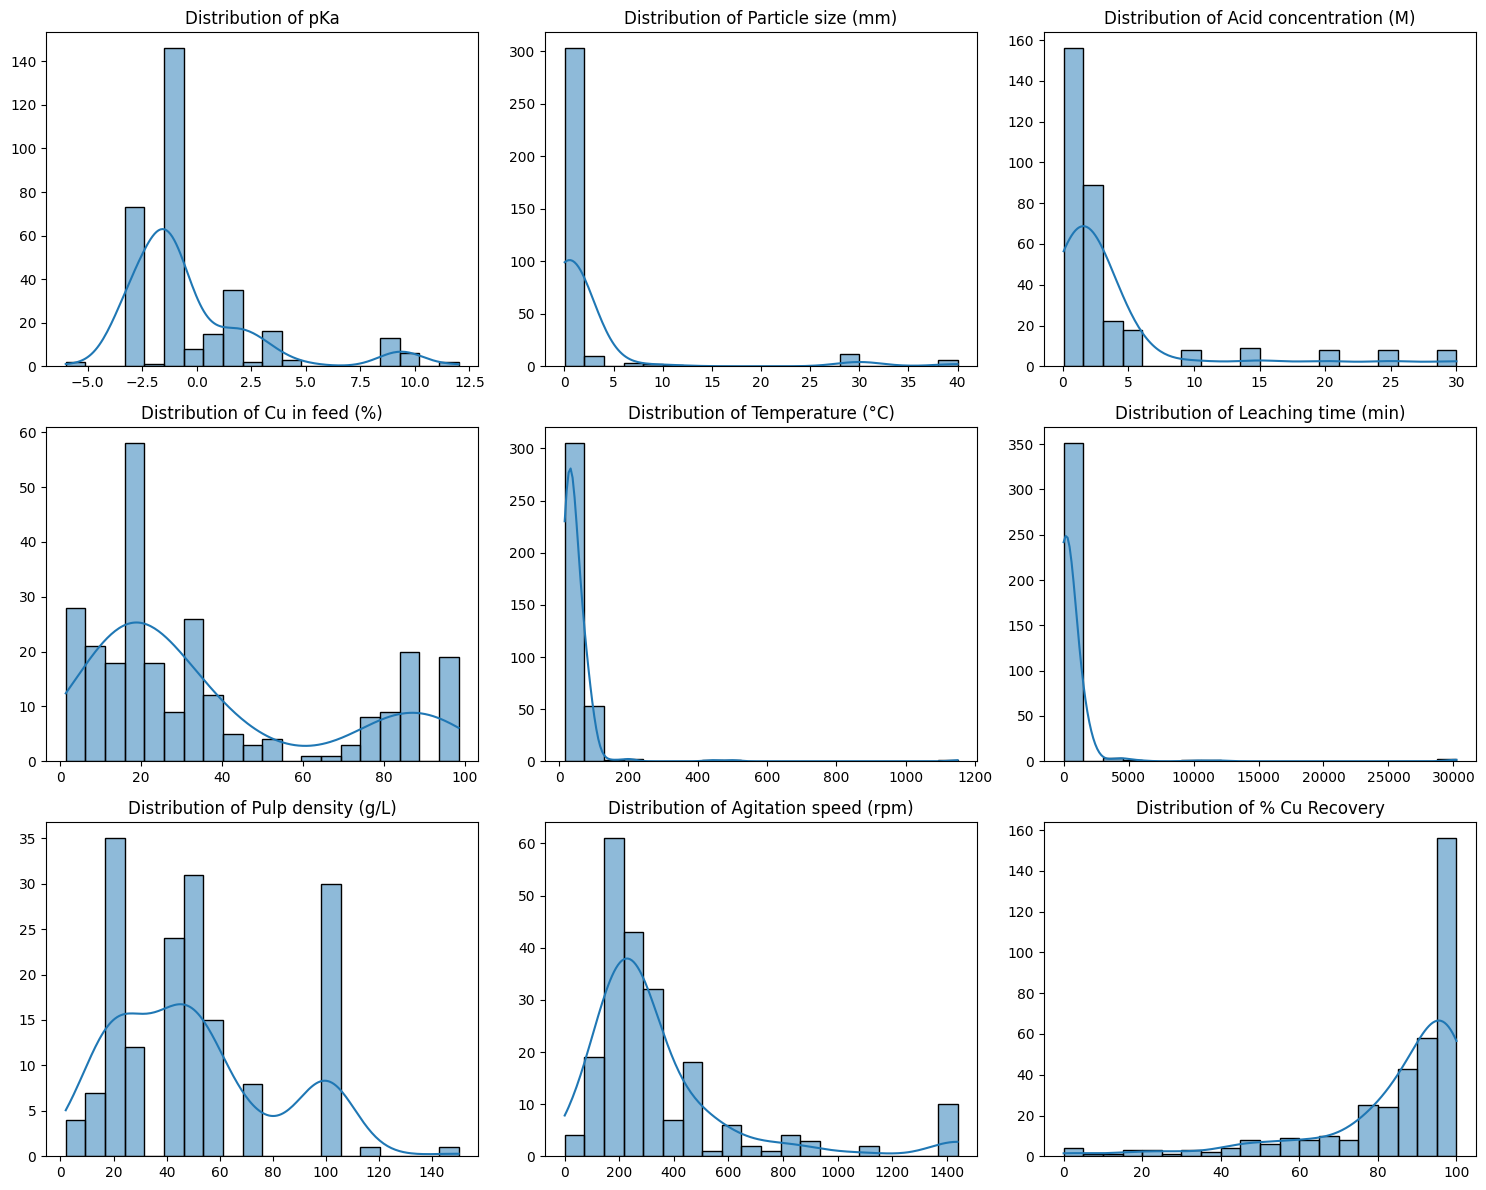

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



file_path = '/kaggle/input/dataset/datset_final.xlsx'

df = pd.read_excel(file_path)
# Data Cleaning 
if '% Cu Recovery' in df.columns:
    df['% Cu Recovery'] = df['% Cu Recovery'].replace('<0.01', 0.0)

cols_to_convert = ['Pulp density (g/L)', '% Cu Recovery']
for col in cols_to_convert:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("Cleaned DataFrame ready for analysis.")
print("\n" + "="*50 + "\n")


# 1. Descriptive Statistics 
print("Descriptive Statistics ")
# Using .T to transpose the output for easier reading
print(df.describe().T)
print("\n" + "="*50 + "\n")


#  2. Plotting Distributions 
print(" Plotting Column Distributions ")

# Select only the numeric columns for plotting
numeric_cols = df.select_dtypes(include=np.number).columns

# Set up 
num_plots = len(numeric_cols)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# histogram for each numeric column
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=20)
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')


for i in range(num_plots, len(axes)):
    axes[i].set_visible(False)
    
plt.tight_layout()

plt.savefig('distributions.png', dpi=300) # dpi for higher resolution
print("\nPlot saved as 'distributions.png'")

plt.show()



Data loaded and cleaned.


Applying imputation techniques...
Tuned KNN imputation complete.
Random Forest imputation complete.
MICE imputation complete.


--- Full Numerical Comparison ---
                        Original Mean  KNN Mean  RF Mean  MICE Mean  \
pKa                             -0.30     -0.28    -0.19      -0.16   
Particle size (mm)               2.49      2.49     2.72       2.56   
Acid concentration (M)           4.09      4.35     3.79       4.32   
Cu in feed (%)                  36.06     32.95    37.79      33.13   
Temperature (°C)                46.73     46.16    48.38      46.62   
Leaching time (min)            606.33    650.18   587.12     581.87   
Pulp density (g/L)              50.08     45.16    53.22      60.66   
Agitation speed (rpm)          350.79    402.56   344.61     518.01   
% Cu Recovery                   84.19     84.20    84.26      84.18   

                        Original Std  KNN Std   RF Std  MICE Std  \
pKa                             

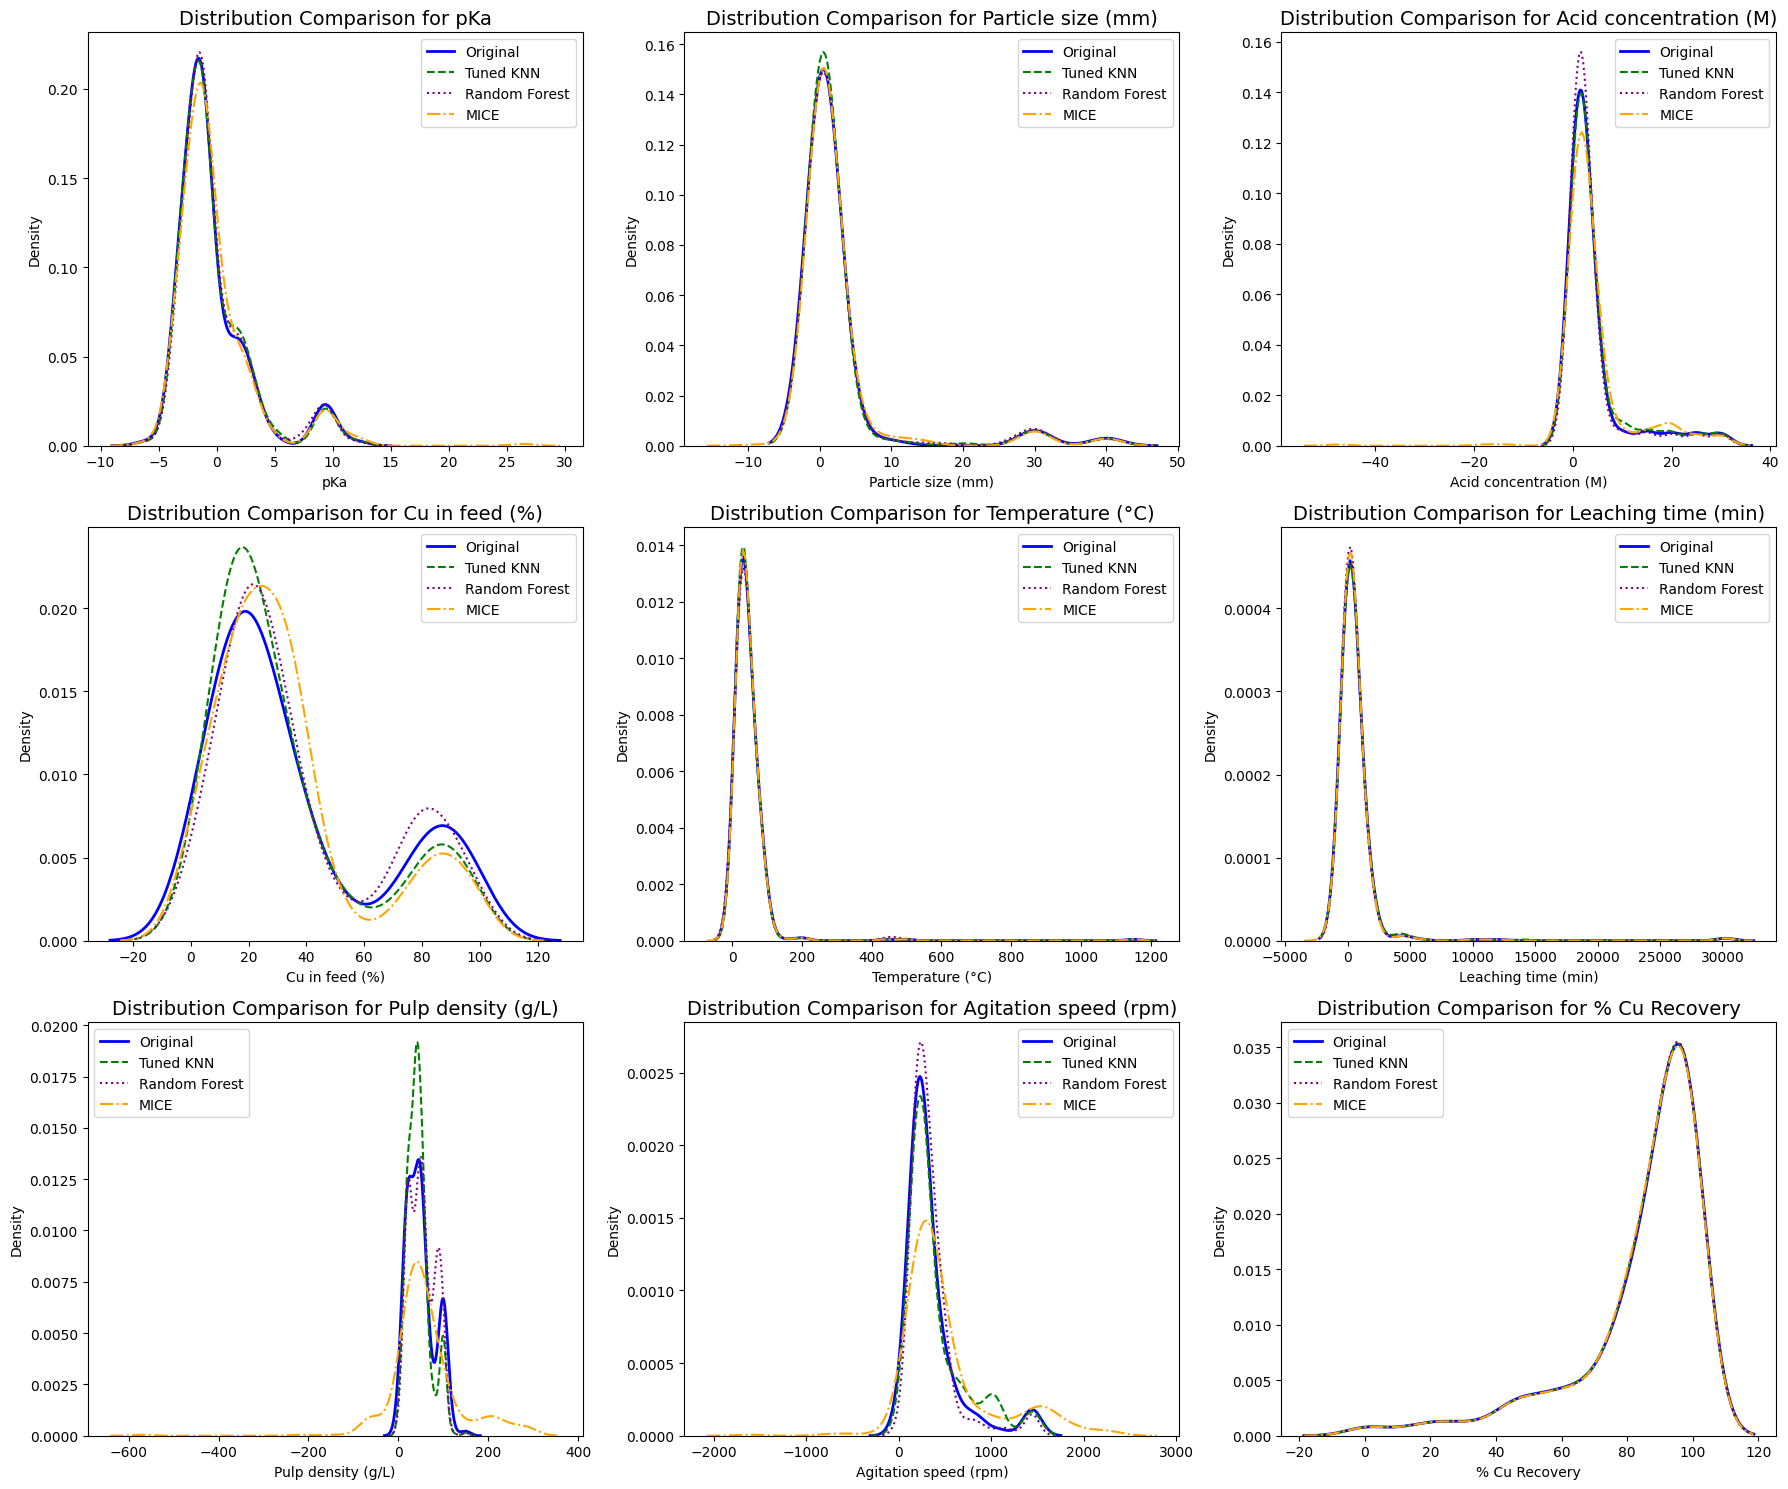

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import wasserstein_distance, ks_2samp, entropy



file_path = '/kaggle/input/dataset/datset_final.xlsx'
df = pd.read_excel(file_path)

if '% Cu Recovery' in df.columns:
    df['% Cu Recovery'] = df['% Cu Recovery'].replace('<0.01', 0.0)
for col in ['Pulp density (g/L)', '% Cu Recovery']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("Data loaded and cleaned.")
print("\n" + "="*50 + "\n")


scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


# 3. Apply Imputation 
print("Applying imputation techniques...")

# Model 1: Tuned KNN Imputer
knn_imputer = KNNImputer(n_neighbors=3)
df_knn_scaled = pd.DataFrame(knn_imputer.fit_transform(df_scaled), columns=df.columns)
df_knn = pd.DataFrame(scaler.inverse_transform(df_knn_scaled), columns=df.columns)
print("Tuned KNN imputation complete.")

# Model 2: Random Forest Imputer
rf_imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=10, random_state=0),
    max_iter=10, 
    random_state=0
)
df_rf_scaled = pd.DataFrame(rf_imputer.fit_transform(df_scaled), columns=df.columns)
df_rf = pd.DataFrame(scaler.inverse_transform(df_rf_scaled), columns=df.columns)
print("Random Forest imputation complete.")

# Model 3: MICE Imputer (Standard)
mice_imputer = IterativeImputer(max_iter=20, random_state=0)
df_mice_scaled = pd.DataFrame(mice_imputer.fit_transform(df_scaled), columns=df.columns)
df_mice = pd.DataFrame(scaler.inverse_transform(df_mice_scaled), columns=df.columns)
print("MICE imputation complete.")

print("\n" + "="*50 + "\n")


#  4. Numerical Comparison 
print("--- Full Numerical Comparison ---")
stats_summary = pd.DataFrame({
    'Original Mean': df.mean(), 'KNN Mean': df_knn.mean(), 'RF Mean': df_rf.mean(), 'MICE Mean': df_mice.mean(),
    'Original Std': df.std(), 'KNN Std': df_knn.std(), 'RF Std': df_rf.std(), 'MICE Std': df_mice.std(),
    'Original Skew': df.skew(), 'KNN Skew': df_knn.skew(), 'RF Skew': df_rf.skew(), 'MICE Skew': df_mice.skew(),
})
print(stats_summary.round(2))
print("\n" + "="*50 + "\n")


# 5. Advanced Statistical Comparison 
print("--- Advanced Statistical Comparison (Lower is better) ---")
dist_results = {}
for col in df.columns:
    original_data = df[col].dropna()
    dist_results[col] = {
        'Wass_Dist (KNN)': wasserstein_distance(original_data, df_knn[col]),
        'Wass_Dist (RF)': wasserstein_distance(original_data, df_rf[col]),
        'Wass_Dist (MICE)': wasserstein_distance(original_data, df_mice[col]),
        'KS_Stat (KNN)': ks_2samp(original_data, df_knn[col]).statistic,
        'KS_Stat (RF)': ks_2samp(original_data, df_rf[col]).statistic,
        'KS_Stat (MICE)': ks_2samp(original_data, df_mice[col]).statistic,
    }
dist_df = pd.DataFrame(dist_results).T
print(dist_df.round(3))
print("\n" + "="*50 + "\n")


# 6. Visual Comparison of Distributions 
print("Plotting distribution comparisons for all columns...")
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    ax = axes[i]
    sns.kdeplot(df[col].dropna(), ax=ax, label='Original', color='blue', linewidth=2, warn_singular=False)
    sns.kdeplot(df_knn[col], ax=ax, label='Tuned KNN', color='green', linestyle='--')
    sns.kdeplot(df_rf[col], ax=ax, label='Random Forest', color='purple', linestyle=':')
    sns.kdeplot(df_mice[col], ax=ax, label='MICE', color='orange', linestyle='-.')
    ax.set_title(f'Distribution Comparison for {col}', fontsize=14)
    ax.legend()

for i in range(len(df.columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.savefig('final_imputation_comparison_all.png', dpi=300)
print("\nComparison plot saved as 'final_imputation_comparison_all.png'")
plt.show()



Data loaded and cleaned.
Original shape: (382, 9)


--- Tuning KNN Imputer (finding best 'k') ---
k = 3, Total Wasserstein Distance = 120.88
k = 5, Total Wasserstein Distance = 146.75
k = 7, Total Wasserstein Distance = 147.51
k = 9, Total Wasserstein Distance = 151.95
k = 11, Total Wasserstein Distance = 151.34
k = 13, Total Wasserstein Distance = 165.95
k = 15, Total Wasserstein Distance = 168.91

Best k found: 3 with lowest total distance.


Applying final tuned KNN imputation with k=3...
Imputation complete.


--- Numerical Comparison (Mean, Std, Skew, Kurtosis) ---
                        Original Mean  Tuned KNN Mean  Original Std  \
pKa                             -0.30           -0.28          3.20   
Particle size (mm)               2.49            2.49          7.54   
Acid concentration (M)           4.09            4.35          6.62   
Cu in feed (%)                  36.06           32.95         29.77   
Temperature (°C)                46.73           46.16         70.47 

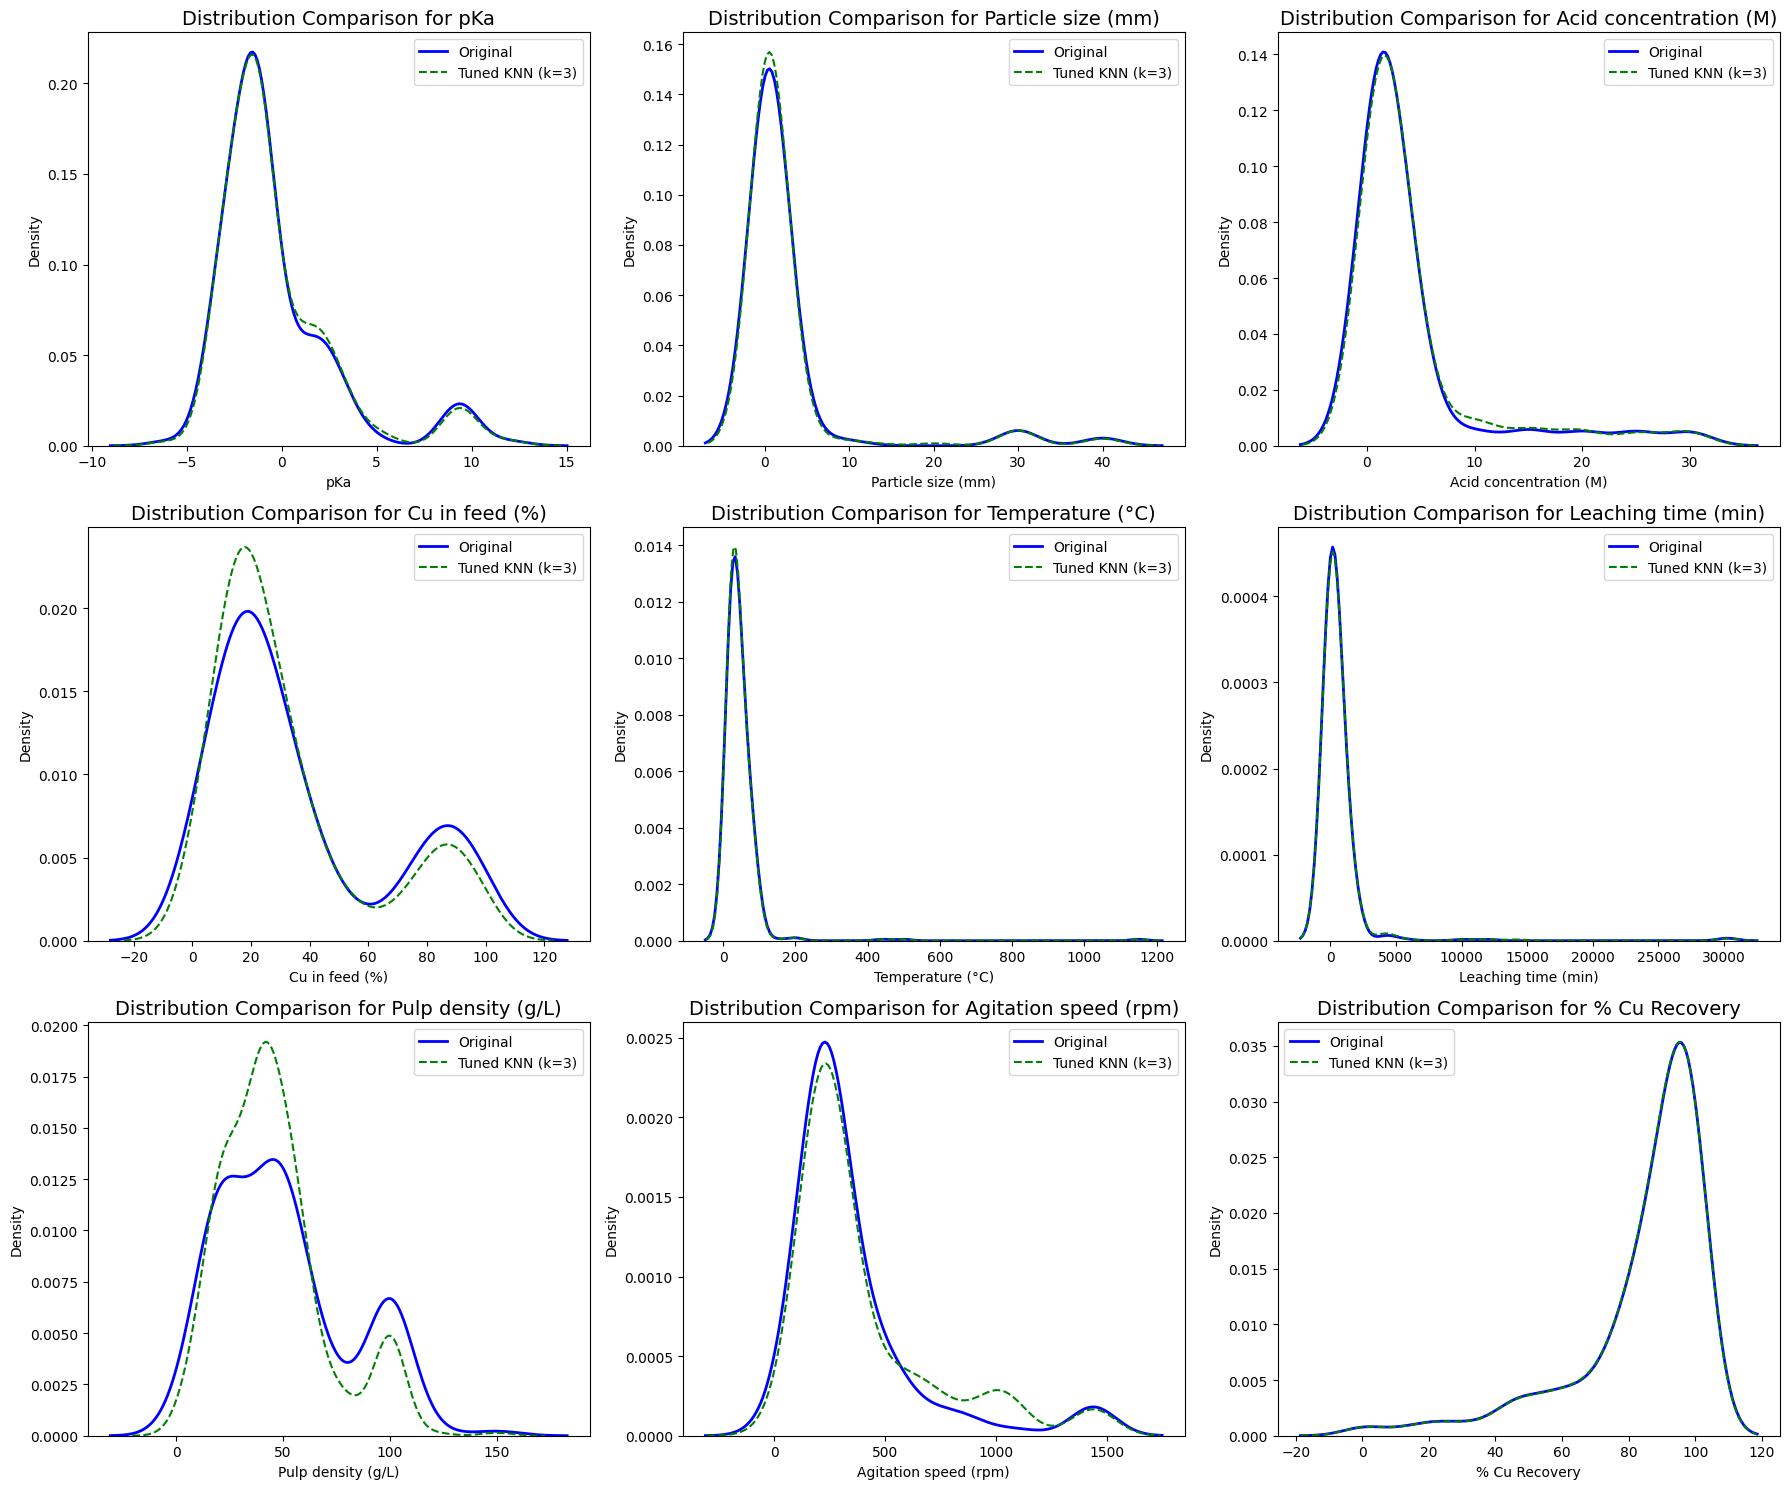

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import wasserstein_distance, ks_2samp, entropy


file_path = '/kaggle/input/dataset/datset_final.xlsx'
df = pd.read_excel(file_path)

if '% Cu Recovery' in df.columns:
    df['% Cu Recovery'] = df['% Cu Recovery'].replace('<0.01', 0.0)
for col in ['Pulp density (g/L)', '% Cu Recovery']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("Data loaded and cleaned.")
print(f"Original shape: {df.shape}")
print("\n" + "="*50 + "\n")


scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


#  3. Hyperparameter Tuning for KNN 

print("--- Tuning KNN Imputer (finding best 'k') ---")
k_values = range(3, 16, 2) # Test odd numbers from 3 to 15
best_k = -1
lowest_distance = float('inf')

for k in k_values:
    # Apply KNN imputation with the current k
    temp_imputer = KNNImputer(n_neighbors=k)
    temp_df_scaled = pd.DataFrame(temp_imputer.fit_transform(df_scaled), columns=df.columns)
    temp_df_imputed = pd.DataFrame(scaler.inverse_transform(temp_df_scaled), columns=df.columns)
    
    # Calculate the total Wasserstein distance as a performance metric
    total_wass_dist = 0
    for col in df.columns:
        total_wass_dist += wasserstein_distance(df[col].dropna(), temp_df_imputed[col])
        
    print(f"k = {k}, Total Wasserstein Distance = {total_wass_dist:.2f}")
    
    if total_wass_dist < lowest_distance:
        lowest_distance = total_wass_dist
        best_k = k

print(f"\nBest k found: {best_k} with lowest total distance.")
print("\n" + "="*50 + "\n")


#  4. Apply Final Tuned KNN Imputation 
print(f"Applying final tuned KNN imputation with k={best_k}...")
final_knn_imputer = KNNImputer(n_neighbors=best_k)
df_knn_scaled = pd.DataFrame(final_knn_imputer.fit_transform(df_scaled), columns=df.columns)
df_knn = pd.DataFrame(scaler.inverse_transform(df_knn_scaled), columns=df.columns)
print("Imputation complete.")
print("\n" + "="*50 + "\n")


#  5. Numerical Comparison (Moments) 
print("--- Numerical Comparison (Mean, Std, Skew, Kurtosis) ---")
stats_summary = pd.DataFrame({
    'Original Mean': df.mean(), 'Tuned KNN Mean': df_knn.mean(),
    'Original Std': df.std(), 'Tuned KNN Std': df_knn.std(),
    'Original Skew': df.skew(), 'Tuned KNN Skew': df_knn.skew(),
    'Original Kurtosis': df.kurt(), 'Tuned KNN Kurtosis': df_knn.kurt()
})
print(stats_summary.round(2))
print("\n" + "="*50 + "\n")


#  6. Advanced Statistical Comparison (Distance & Divergence) 
print("--- Advanced Statistical Comparison ---")
dist_results = {}
for col in df.columns:
    original_data = df[col].dropna()
    knn_imputed = df_knn[col]
    
    ks_knn = ks_2samp(original_data, knn_imputed).statistic
    wass_knn = wasserstein_distance(original_data, knn_imputed)
    
    min_val = min(original_data.min(), knn_imputed.min())
    max_val = max(original_data.max(), knn_imputed.max())
    bins = np.linspace(min_val, max_val, 100)
    
    p = np.histogram(original_data, bins=bins, density=True)[0] + 1e-10
    q_knn = np.histogram(knn_imputed, bins=bins, density=True)[0] + 1e-10
    kl_knn = entropy(p, q_knn)

    dist_results[col] = {
        'KS Statistic': ks_knn, 'Wasserstein Distance': wass_knn, 'KL Divergence': kl_knn
    }

dist_df = pd.DataFrame(dist_results).T
print(dist_df.round(3))
print("\n" + "="*50 + "\n")


#  7. Visual Comparison of Distributions 
print("Plotting distribution comparisons for all columns...")
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    ax = axes[i]
    sns.kdeplot(df[col].dropna(), ax=ax, label='Original', color='blue', linewidth=2, warn_singular=False)
    sns.kdeplot(df_knn[col], ax=ax, label=f'Tuned KNN (k={best_k})', color='green', linestyle='--')
    ax.set_title(f'Distribution Comparison for {col}', fontsize=14)
    ax.legend()

for i in range(len(df.columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.savefig('tuned_knn_comparison.png', dpi=300)
print("\nComparison plot saved as 'tuned_knn_comparison.png'")
plt.show()



Data loaded and cleaned.
Applying tuned KNN imputation with k=3...
Imputation complete.
Final imputed dataset saved as 'imputed_dataset.csv'
Plotting Distribution Comparisons 


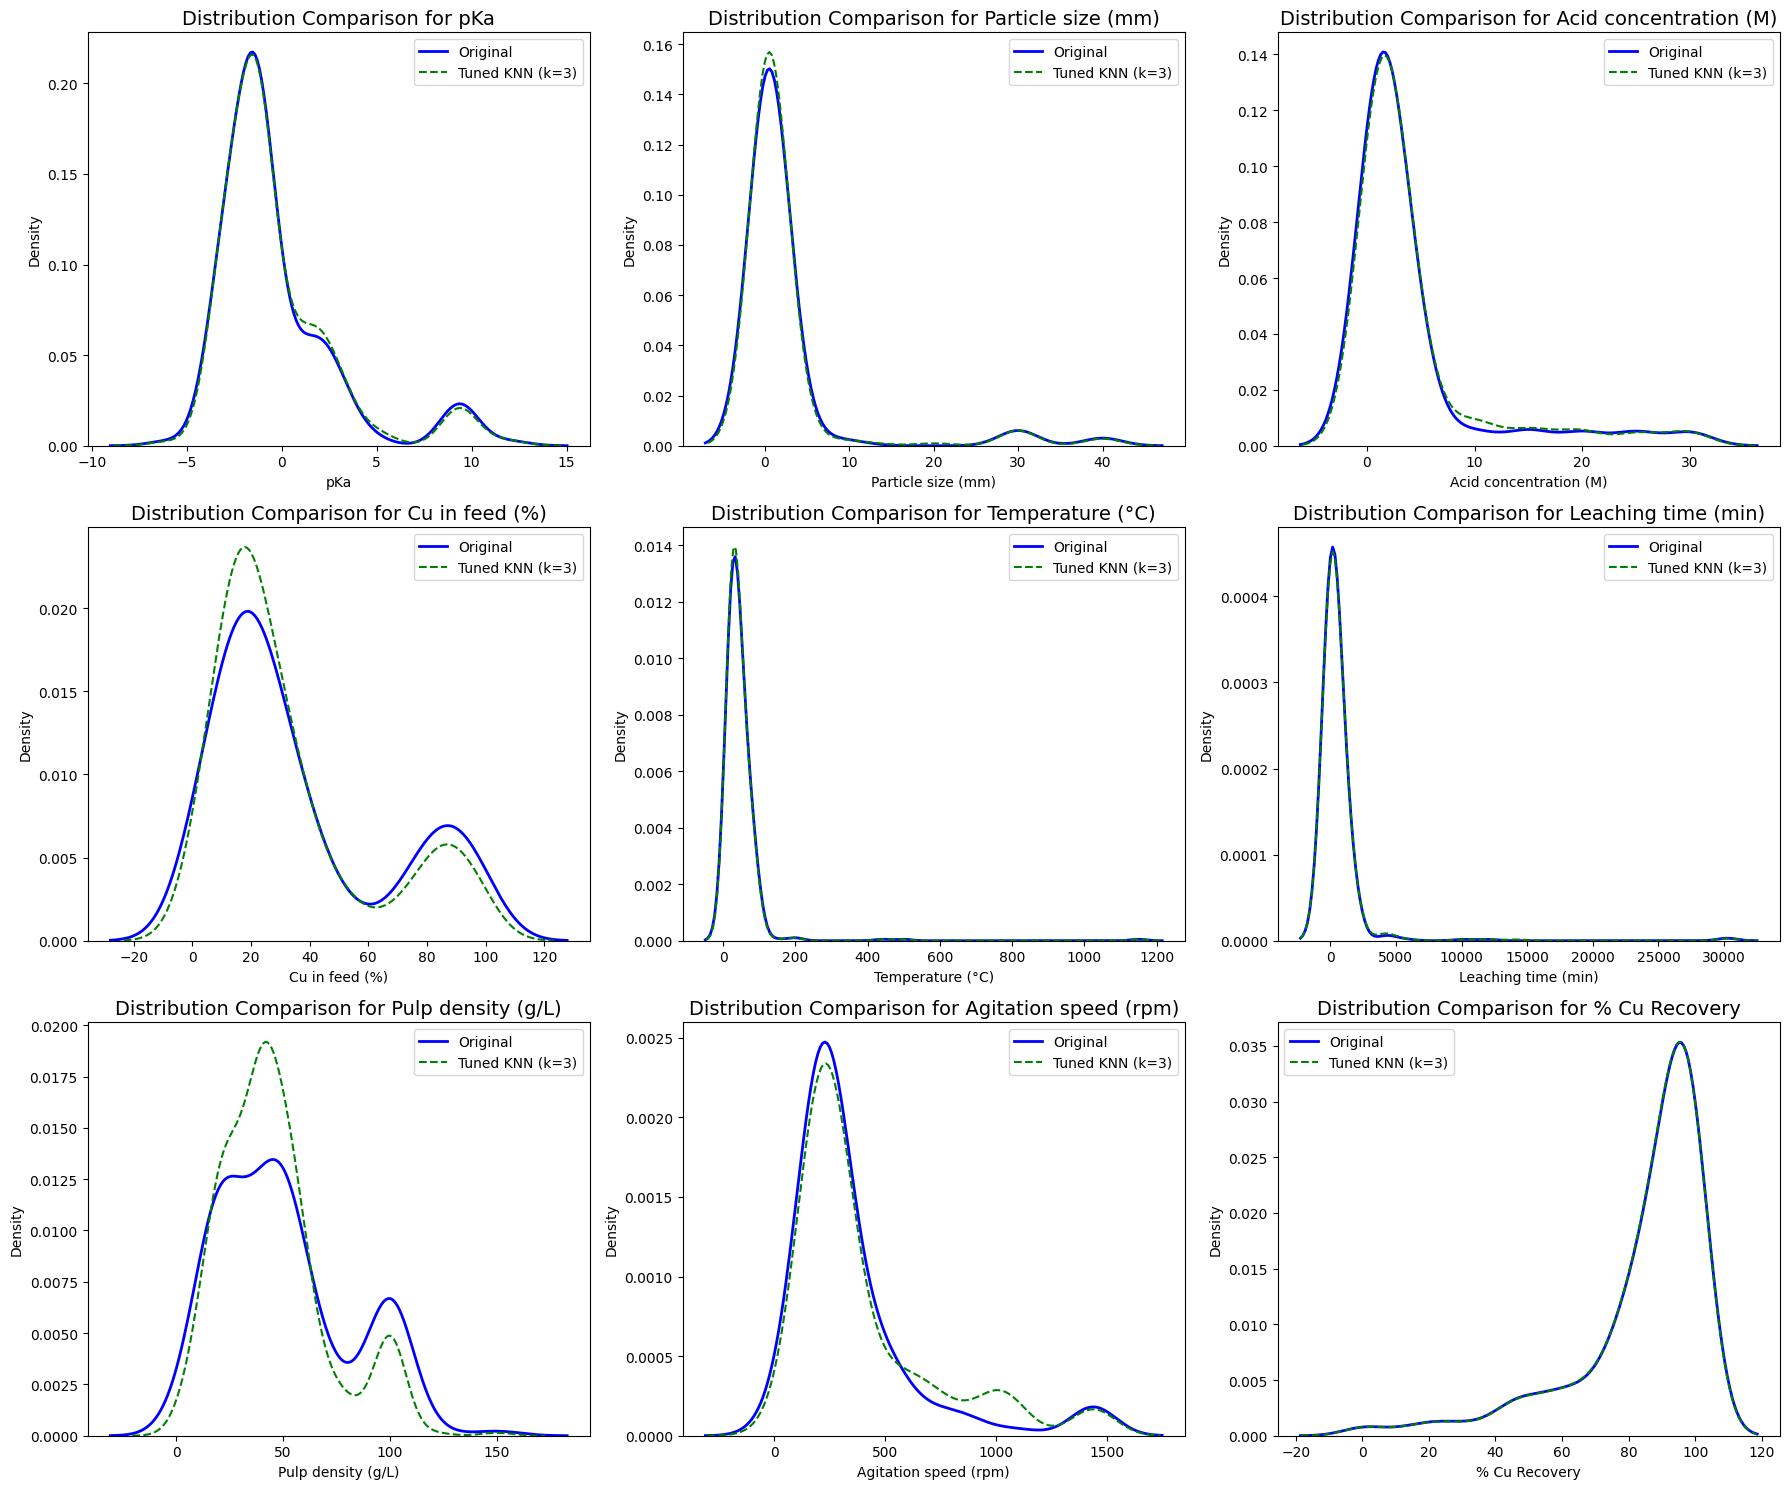


Distribution plot saved as 'final_imputed_distribution.png'
 Plotting Feature Relationships with % Cu Recovery 


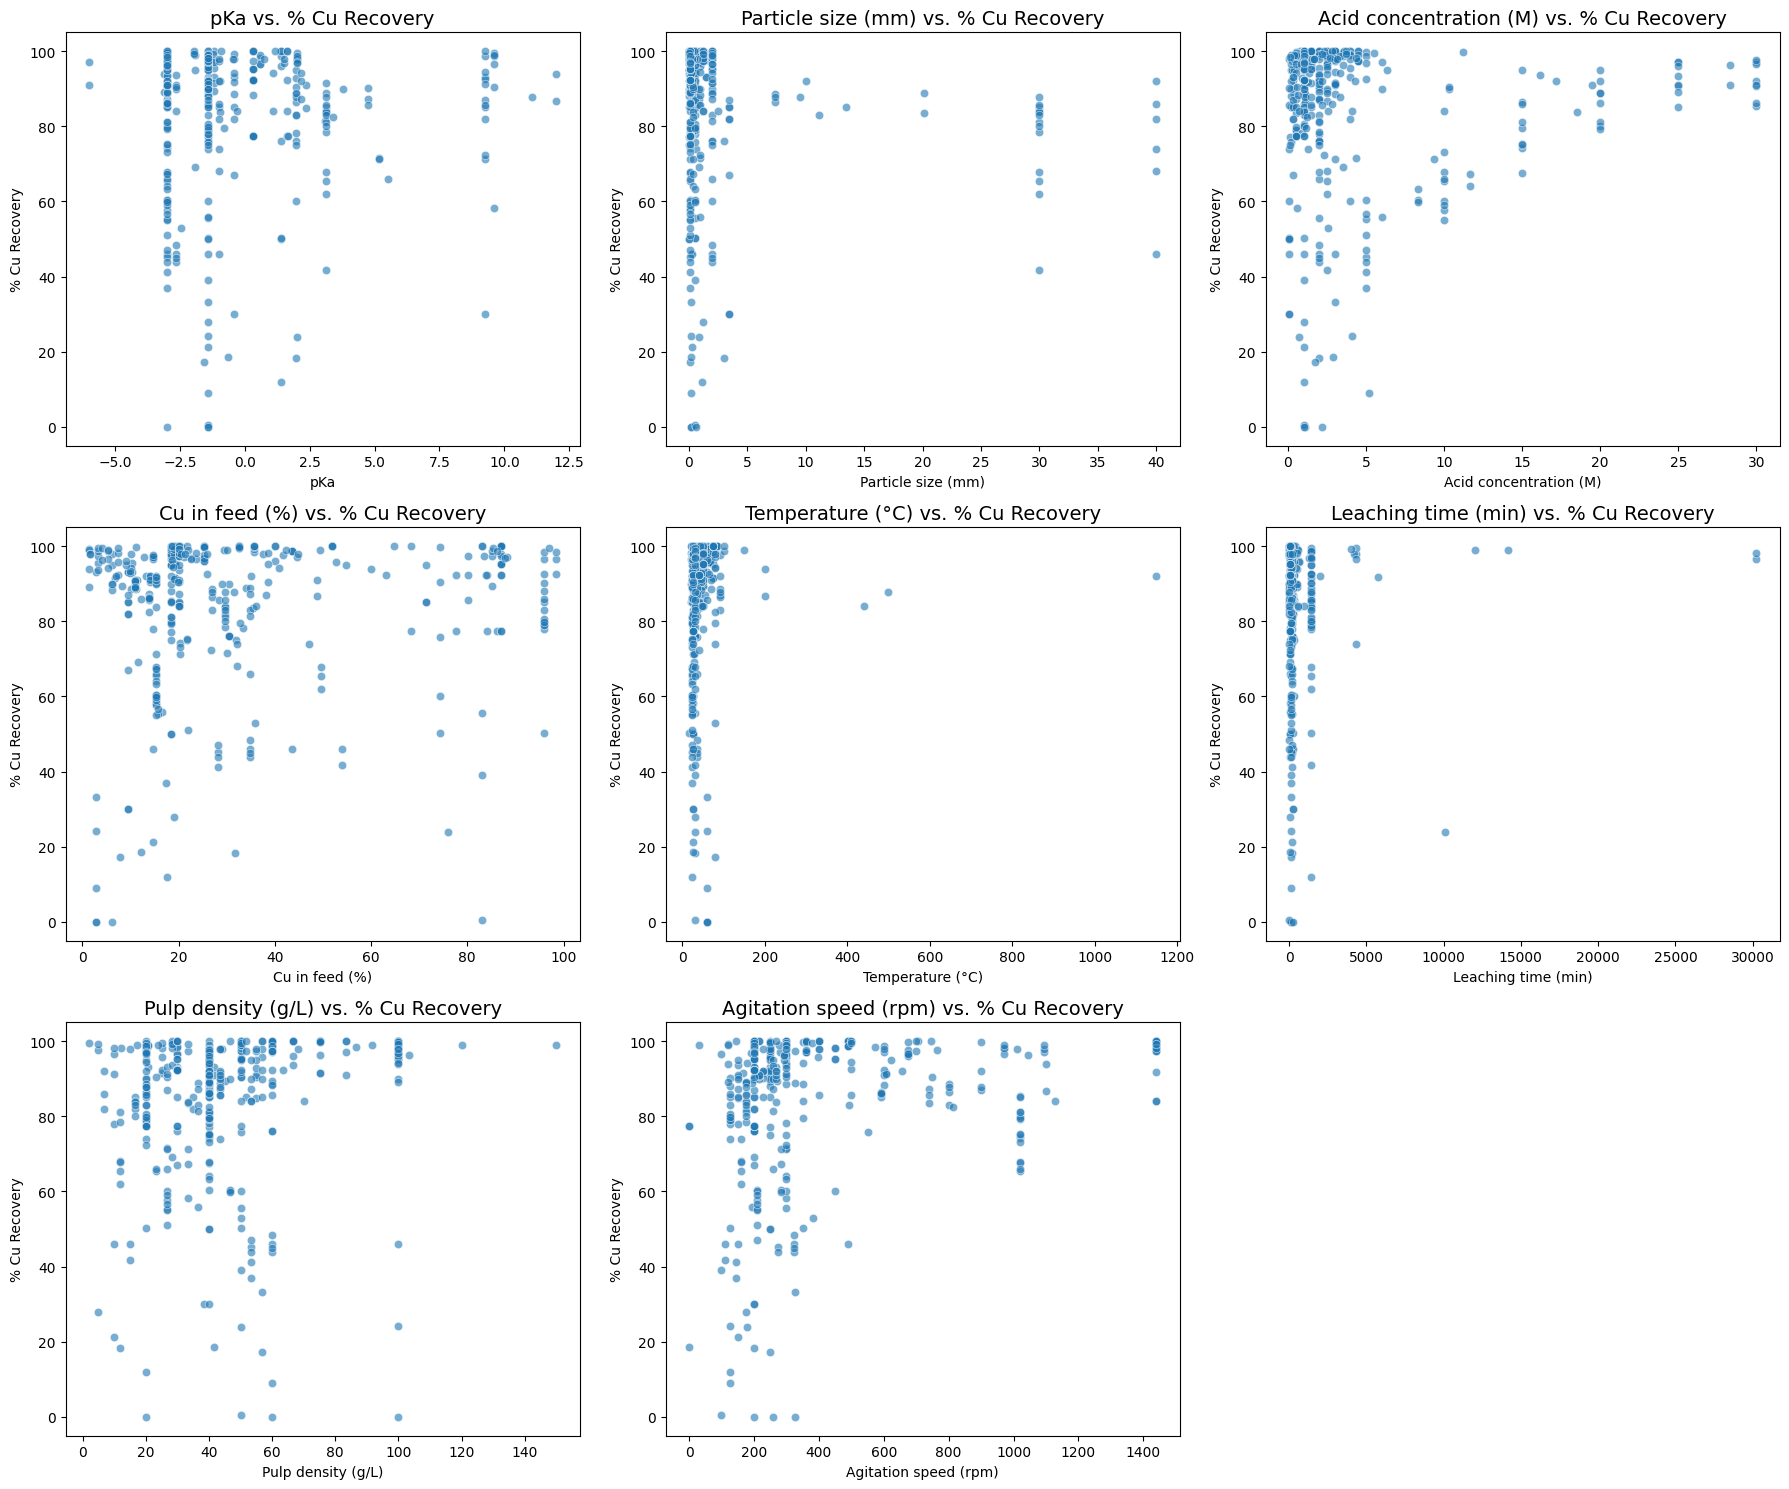


Scatter plots saved as 'feature_scatter_plots.png'
 Generating Correlation Heatmap 


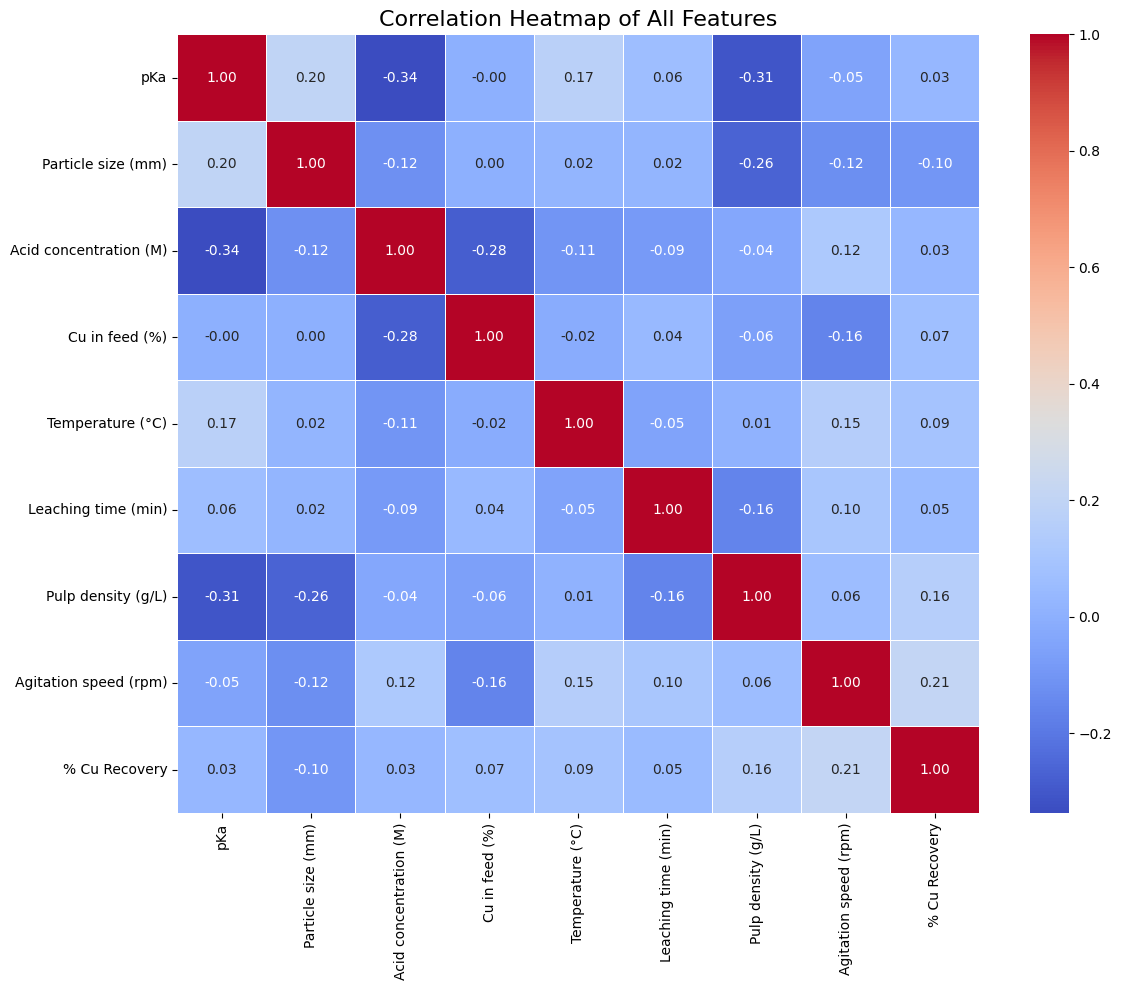


Correlation heatmap saved as 'correlation_heatmap.png'
 Generating Bubble Plot


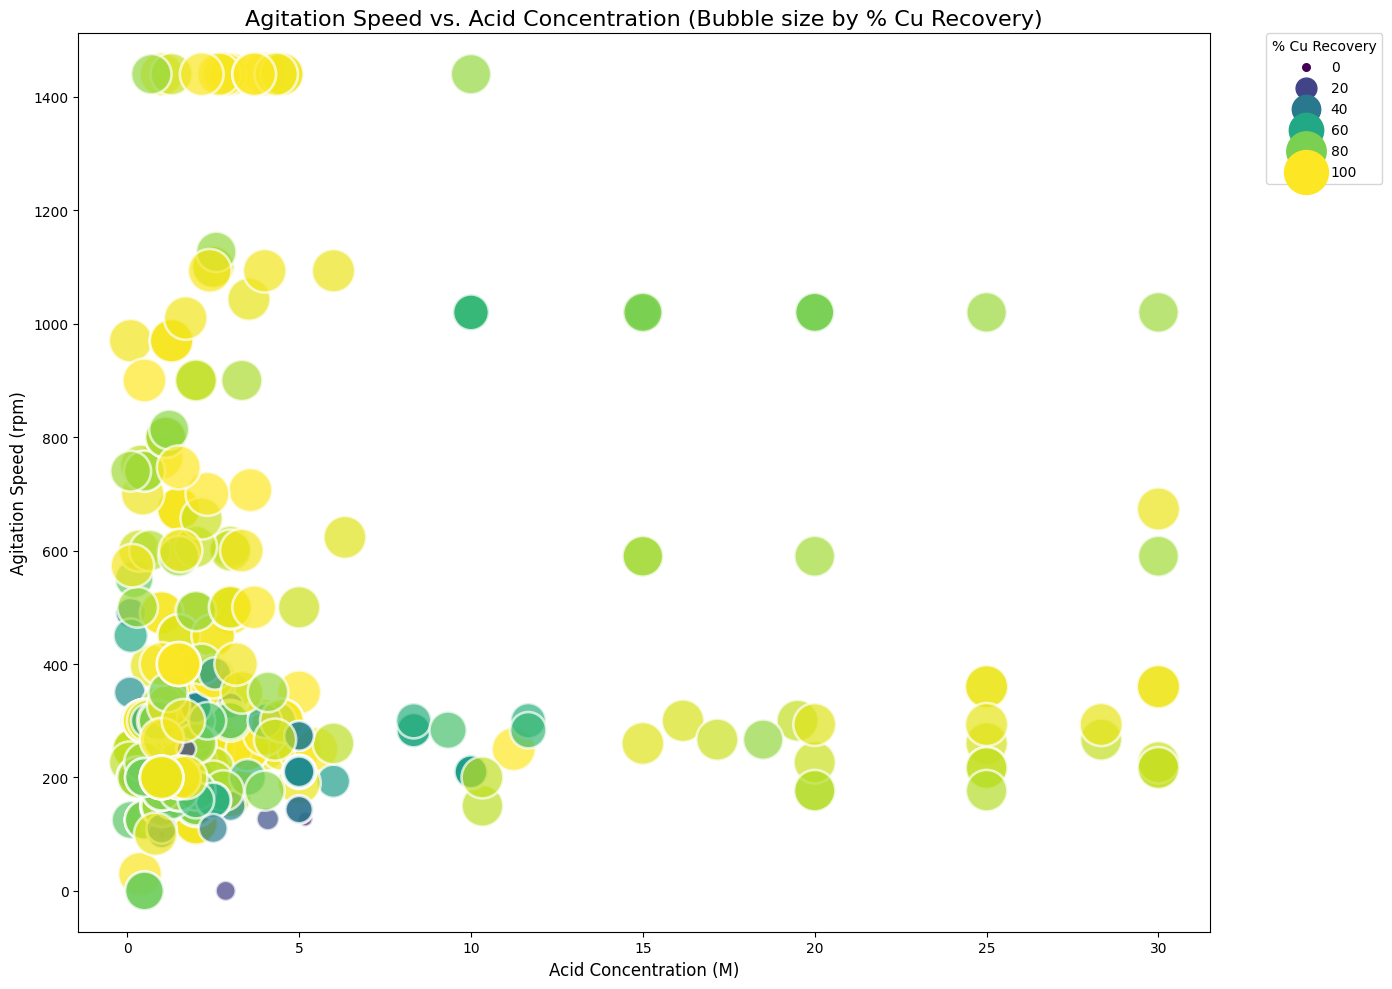


Bubble plot saved as 'bubble_plot.png'
 Generating Specific Scatter Plot 


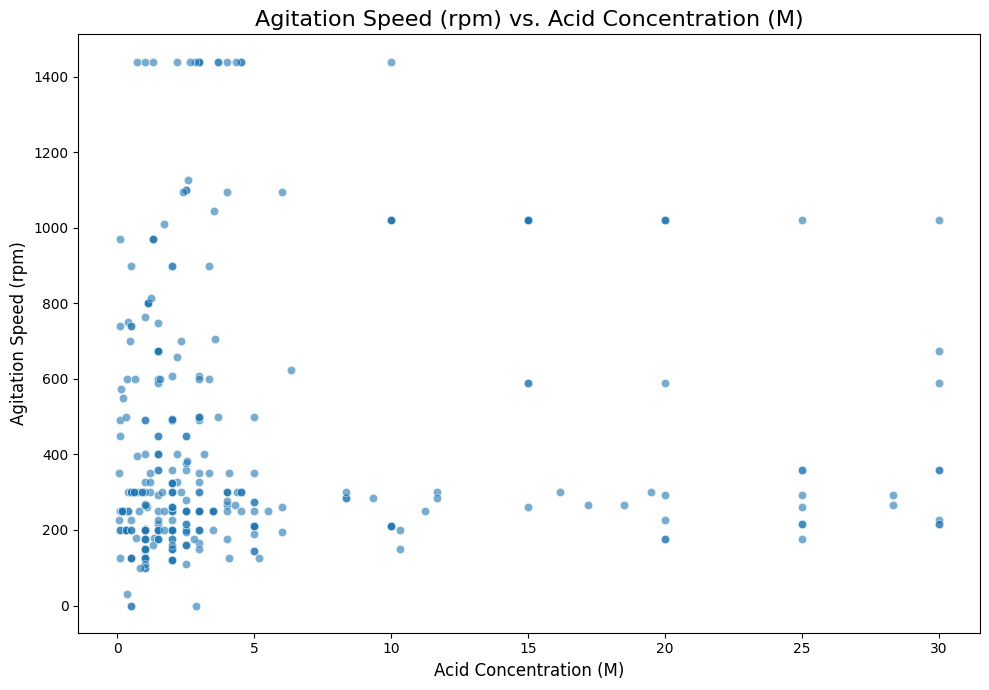


Specific scatter plot saved as 'agitation_vs_acid_scatter.png'


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler


file_path = '/kaggle/input/dataset/datset_final.xlsx'
df = pd.read_excel(file_path)

if '% Cu Recovery' in df.columns:
    df['% Cu Recovery'] = df['% Cu Recovery'].replace('<0.01', 0.0)
for col in ['Pulp density (g/L)', '% Cu Recovery']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("Data loaded and cleaned.")


best_k = 3
print(f"Applying tuned KNN imputation with k={best_k}...")

# Scale the data before imputation
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Apply the imputer
final_knn_imputer = KNNImputer(n_neighbors=best_k)
df_knn_scaled = pd.DataFrame(final_knn_imputer.fit_transform(df_scaled), columns=df.columns)

# Inverse scale the data back to its original range
df_imputed = pd.DataFrame(scaler.inverse_transform(df_knn_scaled), columns=df.columns)
print("Imputation complete.")


#  3. Save the Final Dataset 
output_filename = 'imputed_dataset.csv'
df_imputed.to_csv(output_filename, index=False)
print(f"Final imputed dataset saved as '{output_filename}'")


#  4. Generate  Plots 

#  Plot 1: Distribution Comparisons 
print("Plotting Distribution Comparisons ")
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()
for i, col in enumerate(df.columns):
    ax = axes[i]
    sns.kdeplot(df[col].dropna(), ax=ax, label='Original', color='blue', linewidth=2, warn_singular=False)
    sns.kdeplot(df_imputed[col], ax=ax, label=f'Tuned KNN (k={best_k})', color='green', linestyle='--')
    ax.set_title(f'Distribution Comparison for {col}', fontsize=14)
    ax.legend()
for i in range(len(df.columns), len(axes)):
    axes[i].set_visible(False)
plt.tight_layout()
plt.savefig('final_imputed_distribution.png', dpi=300)
plt.show()
print("\nDistribution plot saved as 'final_imputed_distribution.png'")


#  Plot 2: Feature Scatter Plots vs. % Cu Recovery 
print(" Plotting Feature Relationships with % Cu Recovery ")
target_col = '% Cu Recovery'
feature_cols = [col for col in df_imputed.columns if col != target_col]
num_plots = len(feature_cols)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 5))
axes = axes.flatten()
for i, col in enumerate(feature_cols):
    ax = axes[i]
    sns.scatterplot(data=df_imputed, x=col, y=target_col, ax=ax, alpha=0.6)
    ax.set_title(f'{col} vs. {target_col}', fontsize=14)
for i in range(num_plots, len(axes)):
    axes[i].set_visible(False)
plt.tight_layout()
plt.savefig('feature_scatter_plots.png', dpi=300)
plt.show()
print("\nScatter plots saved as 'feature_scatter_plots.png'")


#  Plot 3: Correlation Heatmap 
print(" Generating Correlation Heatmap ")
corr_matrix = df_imputed.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of All Features', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300)
plt.show()
print("\nCorrelation heatmap saved as 'correlation_heatmap.png'")


#  Plot 4: Bubble Plot 
print(" Generating Bubble Plot")
plt.figure(figsize=(14, 10))
bubble_plot = sns.scatterplot(
    data=df_imputed,
    x='Acid concentration (M)',
    y='Agitation speed (rpm)',
    size='% Cu Recovery',
    hue='% Cu Recovery',
    sizes=(30, 1000),
    palette='viridis',
    alpha=0.7
)
plt.title('Agitation Speed vs. Acid Concentration (Bubble size by % Cu Recovery)', fontsize=16)
plt.xlabel('Acid Concentration (M)', fontsize=12)
plt.ylabel('Agitation Speed (rpm)', fontsize=12)
h, l = bubble_plot.get_legend_handles_labels()
plt.legend(h, l, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='% Cu Recovery')
plt.tight_layout()
plt.savefig('bubble_plot.png', dpi=300)
plt.show()
print("\nBubble plot saved as 'bubble_plot.png'")


#  Plot 5: Specific Scatter Plot (Agitation vs. Acid) 
print(" Generating Specific Scatter Plot ")
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_imputed, 
    x='Acid concentration (M)', 
    y='Agitation speed (rpm)', 
    alpha=0.6
)
plt.title('Agitation Speed (rpm) vs. Acid Concentration (M)', fontsize=16)
plt.xlabel('Acid Concentration (M)', fontsize=12)
plt.ylabel('Agitation Speed (rpm)', fontsize=12)
plt.tight_layout()
plt.savefig('agitation_vs_acid_scatter.png', dpi=300)
plt.show()
print("\nSpecific scatter plot saved as 'agitation_vs_acid_scatter.png'")



Data loaded and cleaned.
Applying tuned KNN imputation with k=3...
Imputation complete.
Final imputed dataset saved as 'imputed_dataset.csv'
--- Plotting Distribution Comparisons ---


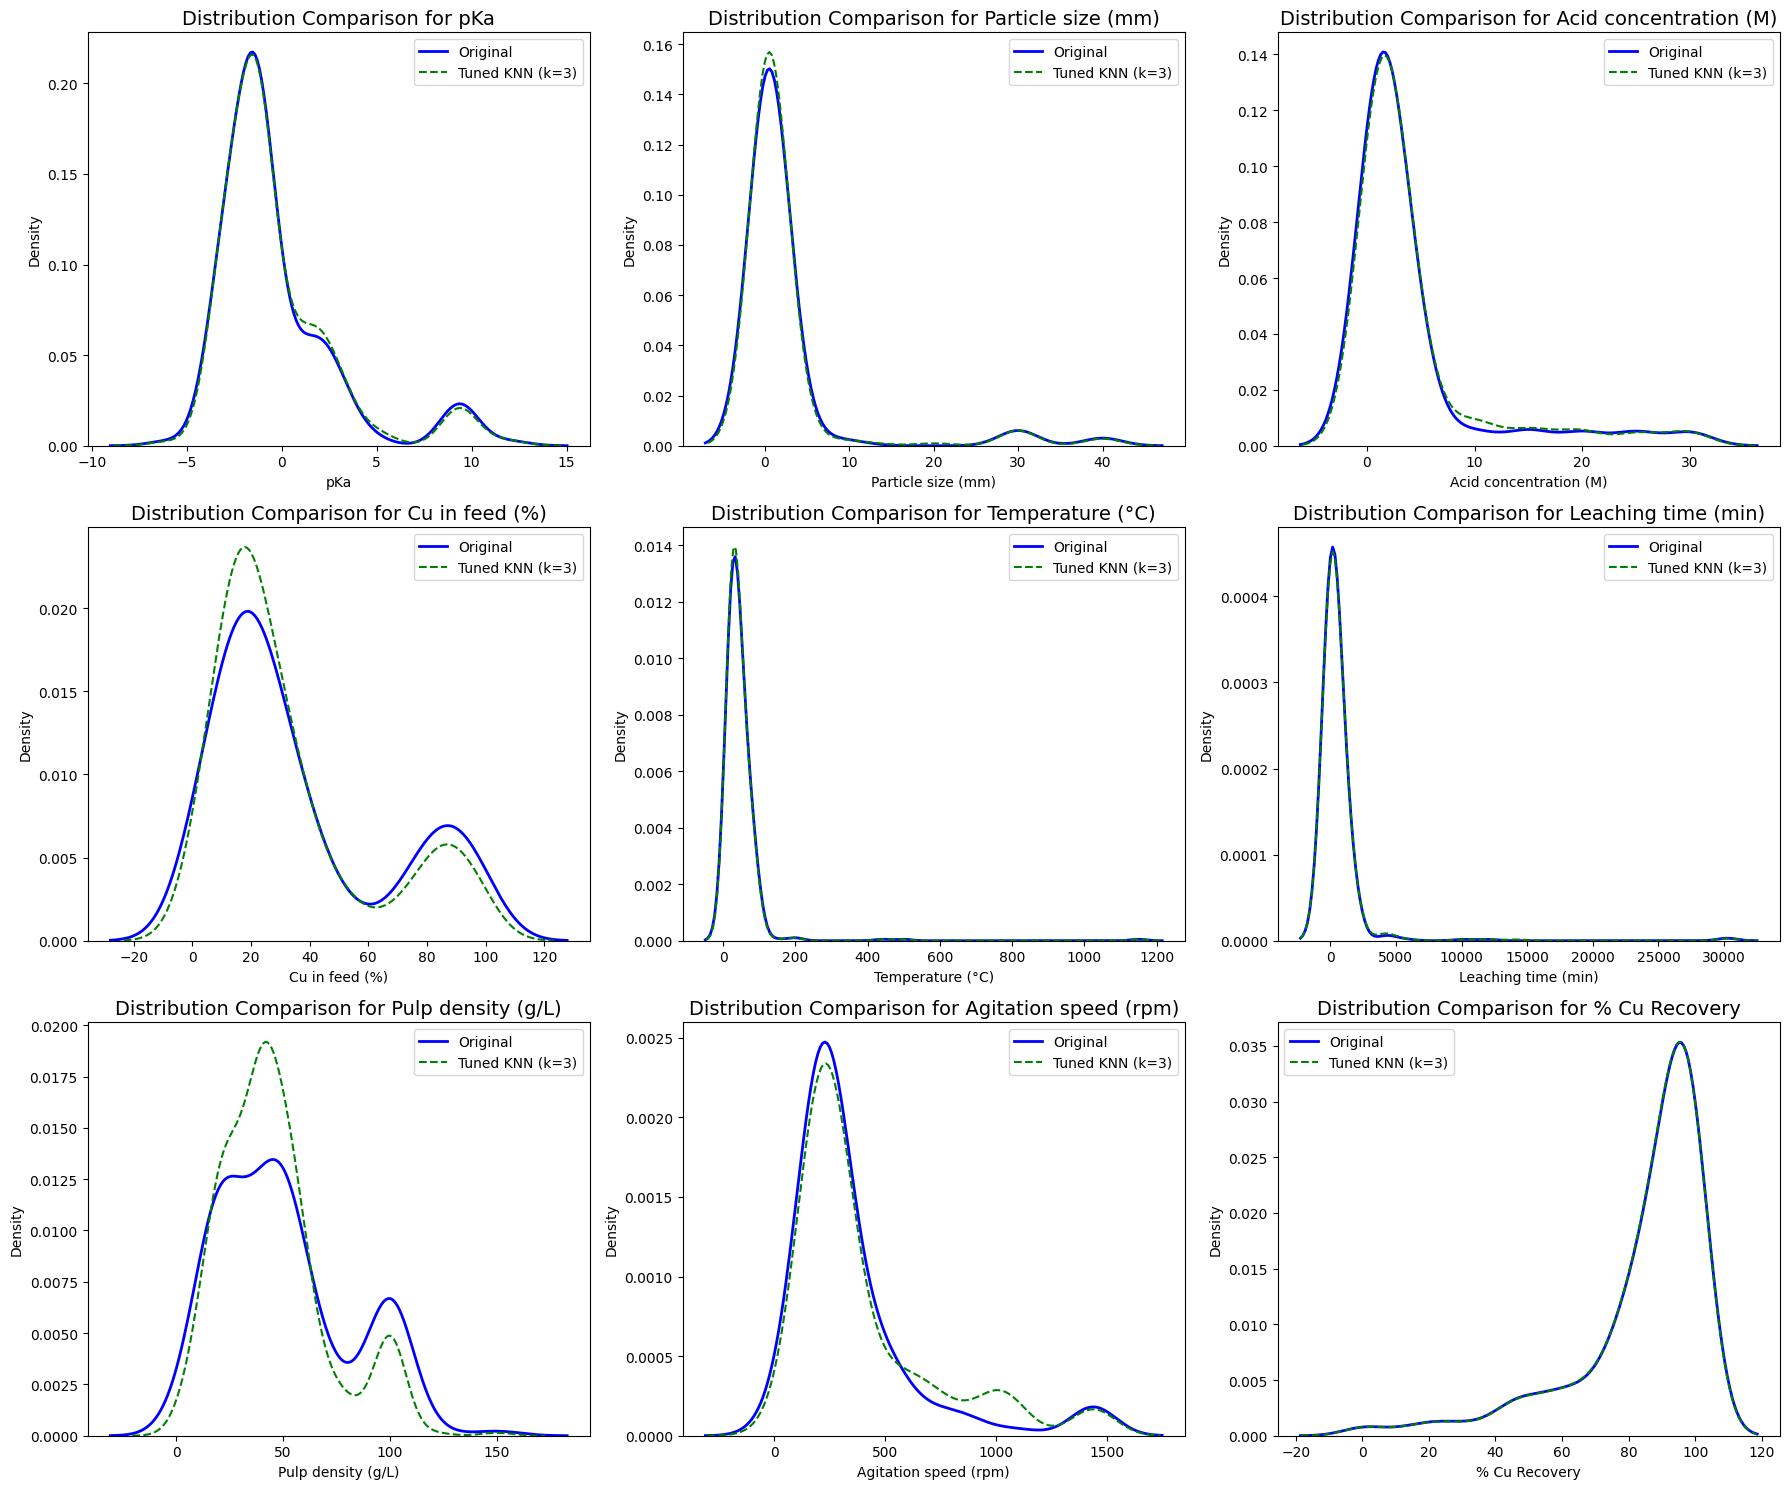


Distribution plot saved as 'final_imputed_distribution.png'
Plotting Feature Relationships with % Cu Recovery 


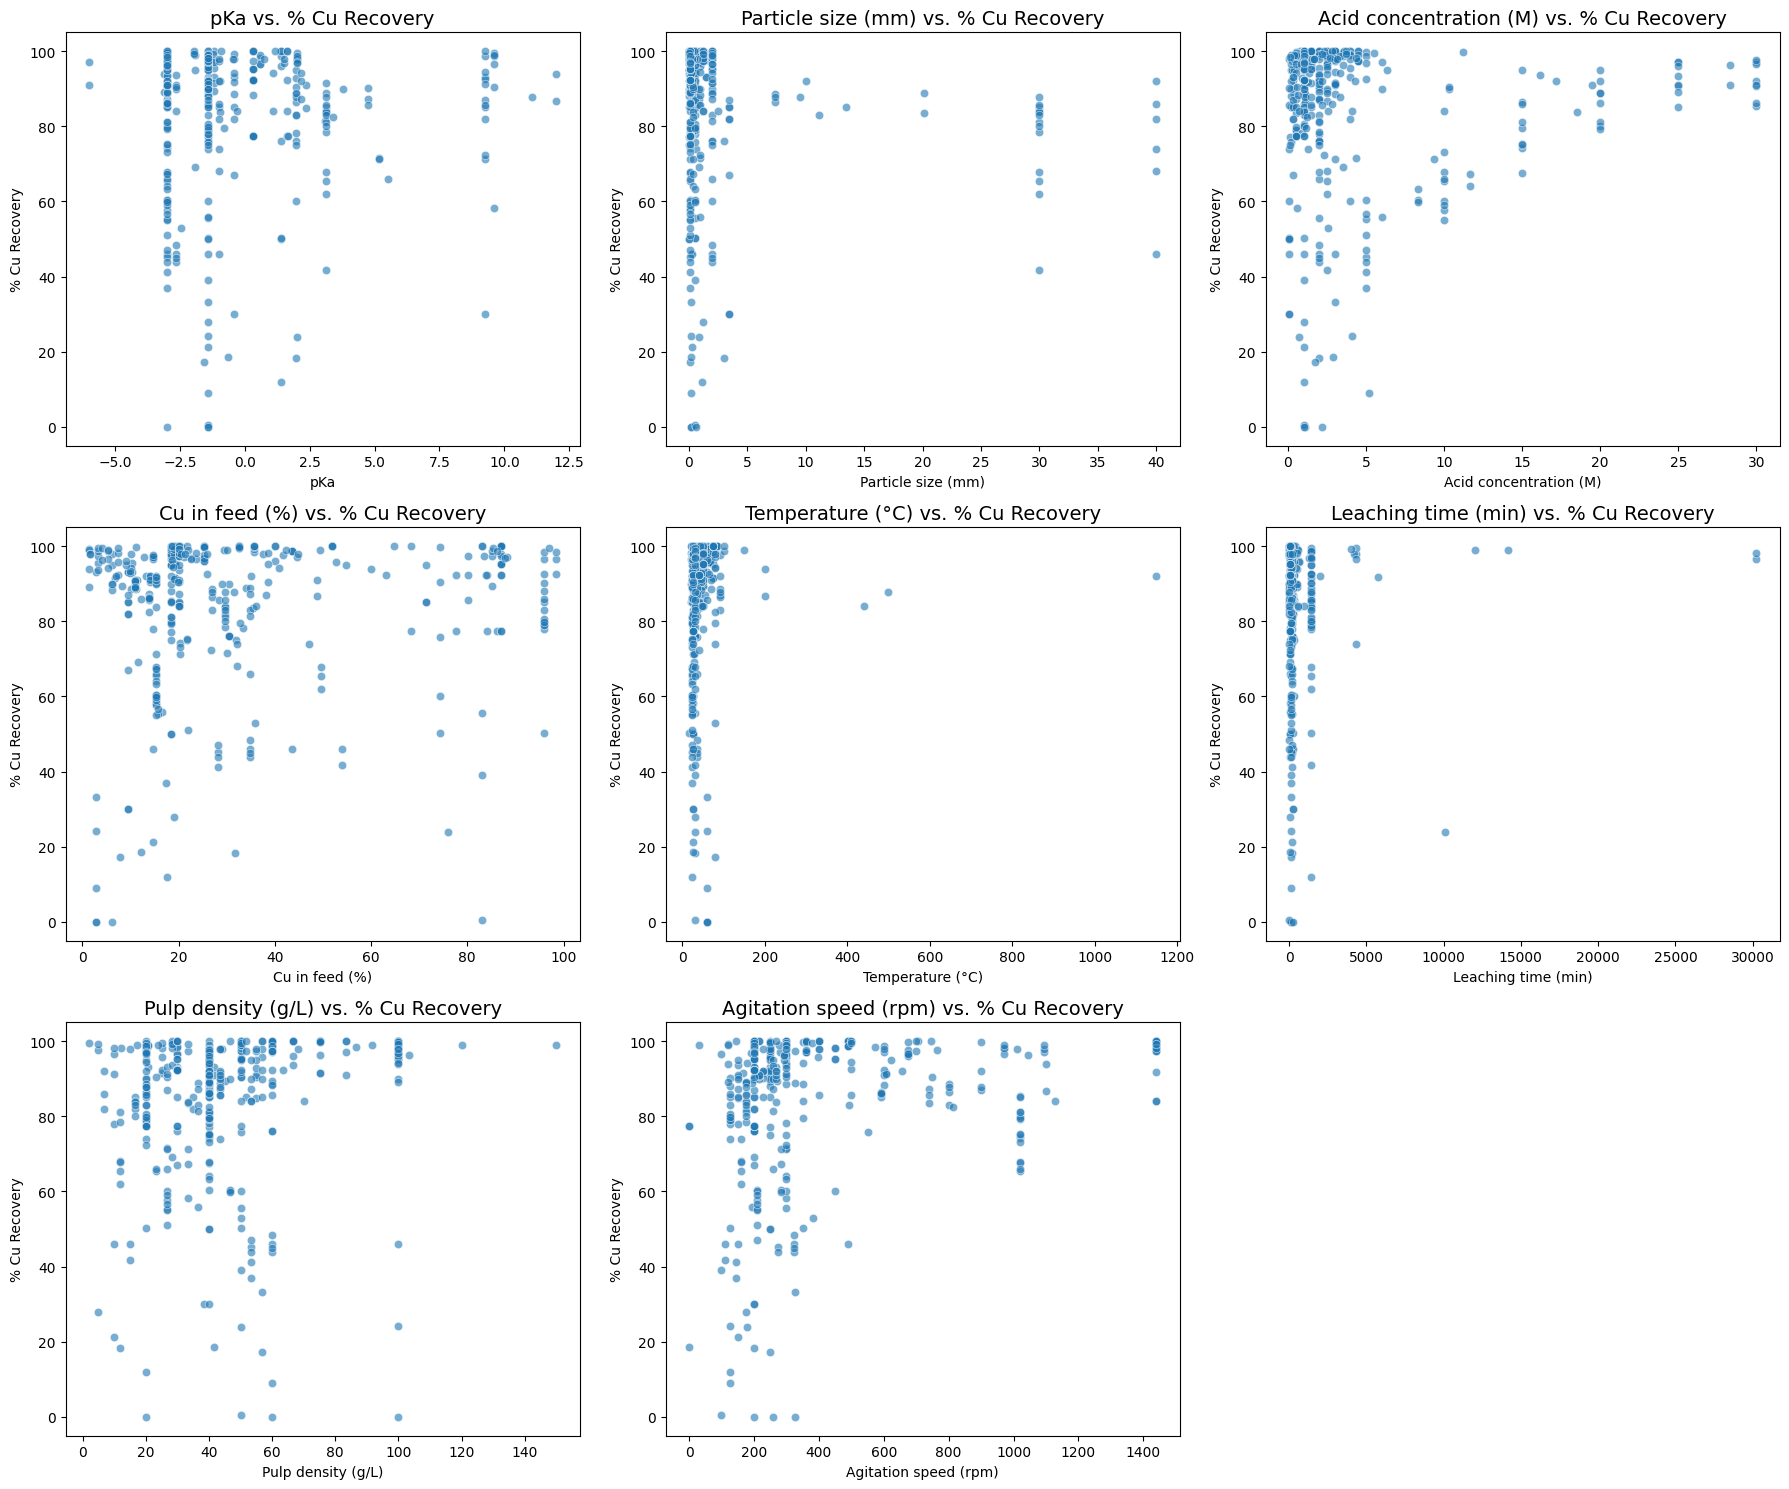


Scatter plots saved as 'feature_scatter_plots.png'
--- Generating Correlation Heatmap ---


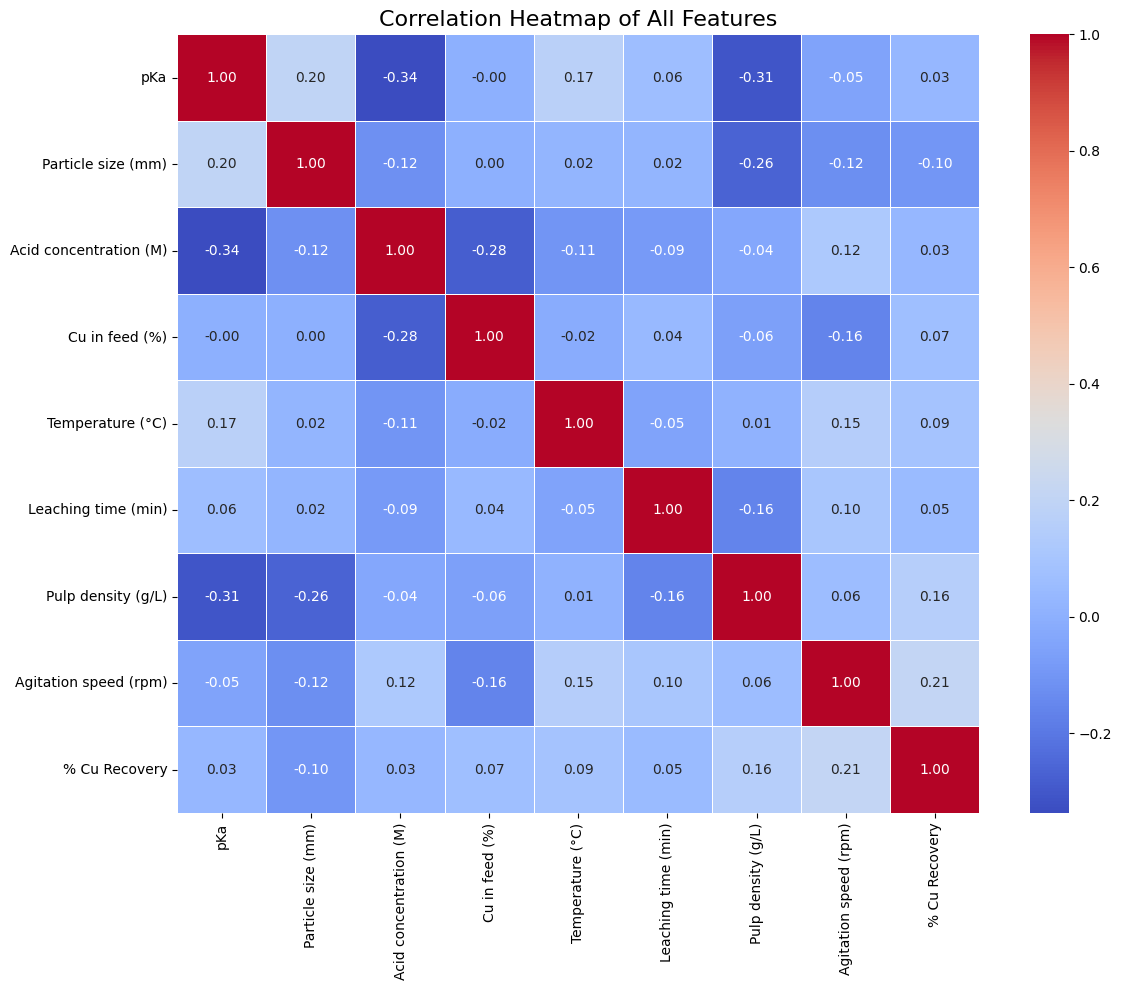


Correlation heatmap saved as 'correlation_heatmap.png'
 Generating Bubble Plot 


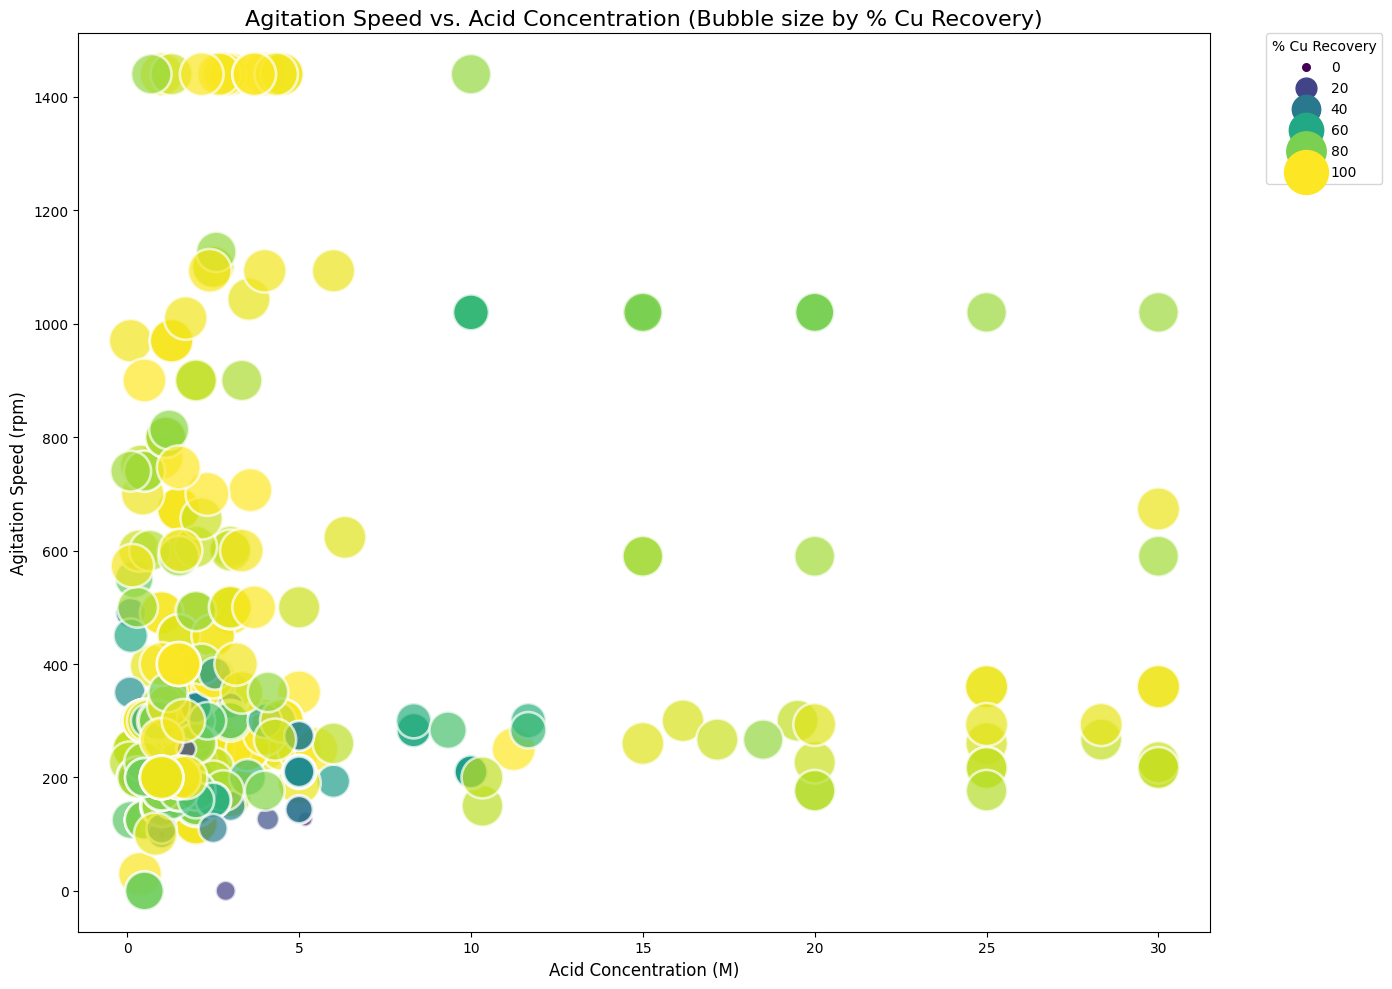


Bubble plot saved as 'bubble_plot.png'
 Generating Specific Scatter Plot: Agitation vs. Acid 


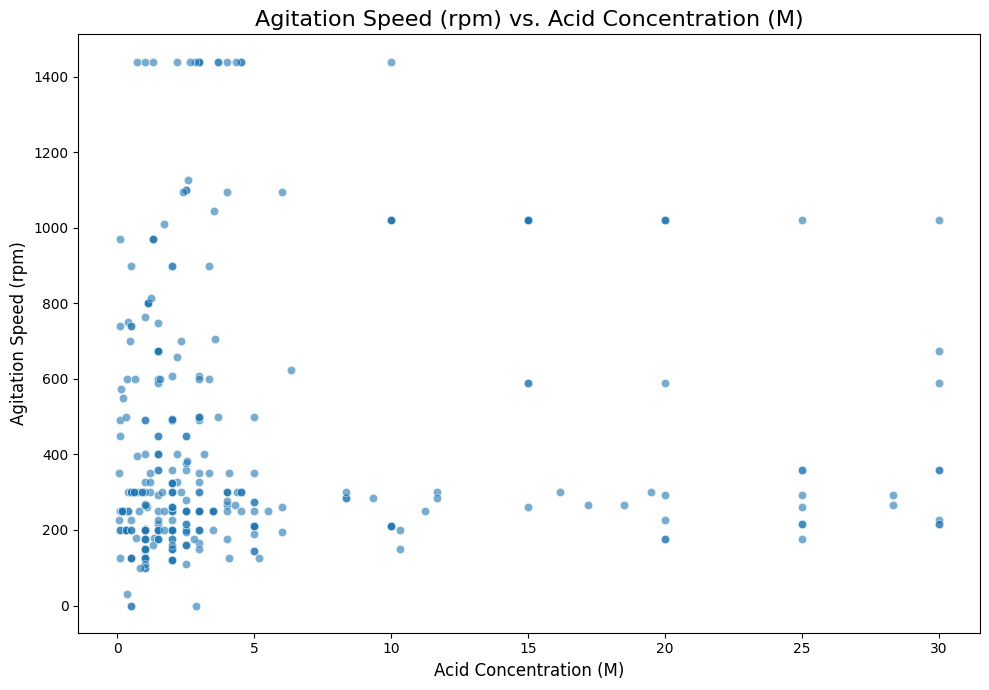


Specific scatter plot saved as 'agitation_vs_acid_scatter.png'
 Generating Specific Scatter Plot: Leaching Time vs. Acid 


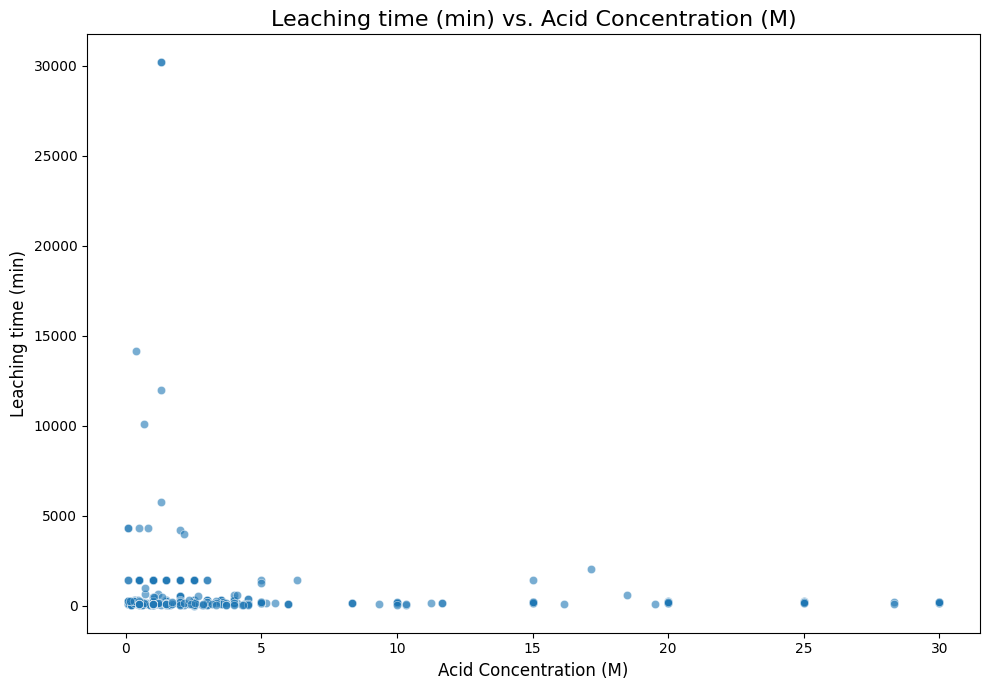


Specific scatter plot saved as 'leaching_vs_acid_scatter.png'


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler



file_path = '/kaggle/input/dataset/datset_final.xlsx'
df = pd.read_excel(file_path)


if '% Cu Recovery' in df.columns:
    df['% Cu Recovery'] = df['% Cu Recovery'].replace('<0.01', 0.0)
for col in ['Pulp density (g/L)', '% Cu Recovery']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("Data loaded and cleaned.")


best_k = 3
print(f"Applying tuned KNN imputation with k={best_k}...")

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

final_knn_imputer = KNNImputer(n_neighbors=best_k)
df_knn_scaled = pd.DataFrame(final_knn_imputer.fit_transform(df_scaled), columns=df.columns)

# Inverse scale the data back to its original range
df_imputed = pd.DataFrame(scaler.inverse_transform(df_knn_scaled), columns=df.columns)
print("Imputation complete.")


output_filename = 'imputed_dataset.csv'
df_imputed.to_csv(output_filename, index=False)
print(f"Final imputed dataset saved as '{output_filename}'")



#  Plot 1: Distribution Comparisons 
print("--- Plotting Distribution Comparisons ---")
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()
for i, col in enumerate(df.columns):
    ax = axes[i]
    sns.kdeplot(df[col].dropna(), ax=ax, label='Original', color='blue', linewidth=2, warn_singular=False)
    sns.kdeplot(df_imputed[col], ax=ax, label=f'Tuned KNN (k={best_k})', color='green', linestyle='--')
    ax.set_title(f'Distribution Comparison for {col}', fontsize=14)
    ax.legend()
for i in range(len(df.columns), len(axes)):
    axes[i].set_visible(False)
plt.tight_layout()
plt.savefig('final_imputed_distribution.png', dpi=300)
plt.show()
print("\nDistribution plot saved as 'final_imputed_distribution.png'")


#  Plot 2: Feature Scatter Plots vs. % Cu Recovery 
print("Plotting Feature Relationships with % Cu Recovery ")
target_col = '% Cu Recovery'
feature_cols = [col for col in df_imputed.columns if col != target_col]
num_plots = len(feature_cols)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 5))
axes = axes.flatten()
for i, col in enumerate(feature_cols):
    ax = axes[i]
    sns.scatterplot(data=df_imputed, x=col, y=target_col, ax=ax, alpha=0.6)
    ax.set_title(f'{col} vs. {target_col}', fontsize=14)
for i in range(num_plots, len(axes)):
    axes[i].set_visible(False)
plt.tight_layout()
plt.savefig('feature_scatter_plots.png', dpi=300)
plt.show()
print("\nScatter plots saved as 'feature_scatter_plots.png'")


#  Plot 3: Correlation Heatmap 
print("--- Generating Correlation Heatmap ---")
corr_matrix = df_imputed.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of All Features', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300)
plt.show()
print("\nCorrelation heatmap saved as 'correlation_heatmap.png'")


#  Plot 4: Bubble Plot 
print(" Generating Bubble Plot ")
plt.figure(figsize=(14, 10))
bubble_plot = sns.scatterplot(
    data=df_imputed,
    x='Acid concentration (M)',
    y='Agitation speed (rpm)',
    size='% Cu Recovery',
    hue='% Cu Recovery',
    sizes=(30, 1000),
    palette='viridis',
    alpha=0.7
)
plt.title('Agitation Speed vs. Acid Concentration (Bubble size by % Cu Recovery)', fontsize=16)
plt.xlabel('Acid Concentration (M)', fontsize=12)
plt.ylabel('Agitation Speed (rpm)', fontsize=12)
h, l = bubble_plot.get_legend_handles_labels()
plt.legend(h, l, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='% Cu Recovery')
plt.tight_layout()
plt.savefig('bubble_plot.png', dpi=300)
plt.show()
print("\nBubble plot saved as 'bubble_plot.png'")


#  Plot 5: Specific Scatter Plot (Agitation vs. Acid) 
print(" Generating Specific Scatter Plot: Agitation vs. Acid ")
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_imputed, 
    x='Acid concentration (M)', 
    y='Agitation speed (rpm)', 
    alpha=0.6
)
plt.title('Agitation Speed (rpm) vs. Acid Concentration (M)', fontsize=16)
plt.xlabel('Acid Concentration (M)', fontsize=12)
plt.ylabel('Agitation Speed (rpm)', fontsize=12)
plt.tight_layout()
plt.savefig('agitation_vs_acid_scatter.png', dpi=300)
plt.show()
print("\nSpecific scatter plot saved as 'agitation_vs_acid_scatter.png'")



#  Plot 6: Specific Scatter Plot (Leaching Time vs. Acid) 
print(" Generating Specific Scatter Plot: Leaching Time vs. Acid ")
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_imputed, 
    x='Acid concentration (M)', 
    y='Leaching time (min)', 
    alpha=0.6
)
plt.title('Leaching time (min) vs. Acid Concentration (M)', fontsize=16)
plt.xlabel('Acid Concentration (M)', fontsize=12)
plt.ylabel('Leaching time (min)', fontsize=12)
plt.tight_layout()
plt.savefig('leaching_vs_acid_scatter.png', dpi=300)
plt.show()
print("\nSpecific scatter plot saved as 'leaching_vs_acid_scatter.png'")




In [45]:
import pandas as pd
import numpy as np
import warnings
import time
import itertools

warnings.filterwarnings('ignore')

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# XGBoost import
import xgboost as xgb

# TensorFlow and Keras imports for the DNN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

print(" Step 1: Loading and Preparing Data ")
file_path = '/kaggle/input/dataset/datset_final.xlsx'
df = pd.read_excel(file_path)

if '% Cu Recovery' in df.columns:
    df['% Cu Recovery'] = df['% Cu Recovery'].replace('<0.01', 0.0)
for col in ['Pulp density (g/L)', '% Cu Recovery']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# KNN Imputation (k=3)
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
final_knn_imputer = KNNImputer(n_neighbors=3)
df_knn_scaled = pd.DataFrame(final_knn_imputer.fit_transform(df_scaled), columns=df.columns)
df_imputed = pd.DataFrame(scaler.inverse_transform(df_knn_scaled), columns=df.columns)
print("Data preparation complete.")


#  2. Prepare Data 
print(" Step 2: Splitting Data and Scaling for Models ")
X = df_imputed.drop('% Cu Recovery', axis=1)
y = df_imputed['% Cu Recovery']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for SVR and DNN
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


#  3. Tune and Evaluate Scikit-learn & XGBoost Models 
print(" Step 3: Starting Model Tuning and Evaluation (Scikit-learn & XGBoost) ")
results = []
models_to_tune = {
    'Random Forest': (RandomForestRegressor(random_state=42), {
        'n_estimators': [100], 'max_depth': [10, 20], 'min_samples_split': [2, 5]
    }),
    'AdaBoost': (AdaBoostRegressor(random_state=42), {
        'n_estimators': [50, 100], 'learning_rate': [0.1, 1.0]
    }),
    'XGBoost': (xgb.XGBRegressor(random_state=42), {
        'n_estimators': [100], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]
    }),
    'SVR': (SVR(), {
        'C': [1, 10], 'kernel': ['rbf']
    })
}

for model_name, (model, params) in models_to_tune.items():
    start_time = time.time()
    print(f" Tuning {model_name} ")
    X_train_data = X_train_scaled if model_name == 'SVR' else X_train
    X_test_data = X_test_scaled if model_name == 'SVR' else X_test

    # Set n_jobs=1 to disable parallel processing and avoid potential errors
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=3, scoring='r2', n_jobs=1, verbose=1)
    grid_search.fit(X_train_data, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_data)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    duration = time.time() - start_time
    
    results.append({
        'Model': model_name, 'R² Score': r2, 'MAE': mae, 'RMSE': rmse, 
        'Tuning Time (s)': duration, 'Best Params': grid_search.best_params_
    })
    print(f"Finished tuning {model_name} in {duration:.2f} seconds. R²: {r2:.4f}")



#  4. Manually Tune and Evaluate DNN 
print(" Step 4: Manually Tuning and Evaluating DNN ")
start_time = time.time()

def create_dnn_model(optimizer='adam', dropout_rate=0.2, neurons=64, layers=2):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train_scaled.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    for _ in range(layers - 1):
        model.add(Dense(neurons // 2, activation='relu'))
        model.add(Dropout(dropout_rate))
        neurons = max(8, neurons // 2)
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Define a smaller DNN hyperparameter grid for speed
dnn_params = {
    'epochs': [50],
    'batch_size': [32],
    'optimizer': ['adam'],
    'neurons': [64],
    'layers': [2],
    'dropout_rate': [0.2]
}

best_val_loss = float('inf')
best_dnn_params = {}
param_combinations = list(itertools.product(*dnn_params.values()))

print(f"Testing {len(param_combinations)} DNN hyperparameter combination(s)...")

for i, params_tuple in enumerate(param_combinations):
    current_params = dict(zip(dnn_params.keys(), params_tuple))
    
    model_creation_params = {
        'optimizer': current_params['optimizer'],
        'dropout_rate': current_params['dropout_rate'],
        'neurons': current_params['neurons'],
        'layers': current_params['layers']
    }
    model = create_dnn_model(**model_creation_params)
    
    history = model.fit(
        X_train_scaled, y_train,
        epochs=current_params['epochs'],
        batch_size=current_params['batch_size'],
        validation_split=0.2,
        verbose=0
    )
    
    val_loss = np.min(history.history['val_loss'])
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_dnn_params = current_params

print("\nFound best DNN params:", best_dnn_params)

# Train the final best DNN model
print("Training final DNN model...")
final_model_creation_params = {
    'optimizer': best_dnn_params['optimizer'],
    'dropout_rate': best_dnn_params['dropout_rate'],
    'neurons': best_dnn_params['neurons'],
    'layers': best_dnn_params['layers']
}
final_dnn = create_dnn_model(**final_model_creation_params)
final_dnn.fit(X_train_scaled, y_train, epochs=best_dnn_params['epochs'], batch_size=best_dnn_params['batch_size'], verbose=0)

# Evaluate the final DNN model
y_pred_dnn = final_dnn.predict(X_test_scaled).flatten()
r2_dnn = r2_score(y_test, y_pred_dnn)
mae_dnn = mean_absolute_error(y_test, y_pred_dnn)
rmse_dnn = np.sqrt(mean_squared_error(y_test, y_pred_dnn))
duration_dnn = time.time() - start_time

results.append({
    'Model': 'DNN', 'R² Score': r2_dnn, 'MAE': mae_dnn, 'RMSE': rmse_dnn,
    'Tuning Time (s)': duration_dnn, 'Best Params': best_dnn_params
})
print(f"Finished tuning DNN in {duration_dnn:.2f} seconds. R²: {r2_dnn:.4f}")



#  5. Display Final Results 
print(" Step 5: Final Model Performance Comparison ")
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='R² Score', ascending=False).reset_index(drop=True)

print(results_df[['Model', 'R² Score', 'MAE', 'RMSE', 'Tuning Time (s)']].round(4))

# Displaying the best parameters for each model
print("\n Best Hyperparameters Found ")
for index, row in results_df.iterrows():
    print(f"\n{row['Model']}:")
    print(row['Best Params'])




 Step 1: Loading and Preparing Data 
Data preparation complete.
 Step 2: Splitting Data and Scaling for Models 
Training set shape: (305, 8)
Test set shape: (77, 8)
 Step 3: Starting Model Tuning and Evaluation (Scikit-learn & XGBoost) 
 Tuning Random Forest 
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Finished tuning Random Forest in 2.04 seconds. R²: 0.3296
 Tuning AdaBoost 
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Finished tuning AdaBoost in 1.18 seconds. R²: 0.2094
 Tuning XGBoost 
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Finished tuning XGBoost in 0.45 seconds. R²: 0.3096
 Tuning SVR 
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Finished tuning SVR in 0.03 seconds. R²: 0.0332
 Step 4: Manually Tuning and Evaluating DNN 
Testing 1 DNN hyperparameter combination(s)...

Found best DNN params: {'epochs': 50, 'batch_size': 32, 'optimizer': 'adam', 'neurons': 64, 'layers': 2, 'dropout_rate': 0.2}
Training final DNN mode

In [46]:
import pandas as pd
import numpy as np
import warnings
import time
import joblib

# Install required libraries
!pip install lightgbm catboost -q

# General warning filter to suppress all warnings for a cleaner output
warnings.filterwarnings('ignore')

# Scikit-learn imports
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# XGBoost and LightGBM imports
import xgboost as xgb
import lightgbm as lgb

print("--- Step 1: Loading and Preparing Data ---")
file_path = '/kaggle/input/dataset/datset_final.xlsx'
df = pd.read_excel(file_path)

# Perform the cleaning steps
if '% Cu Recovery' in df.columns:
    df['% Cu Recovery'] = df['% Cu Recovery'].replace('<0.01', 0.0)
for col in ['Pulp density (g/L)', '% Cu Recovery']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Apply Final Tuned KNN Imputation (k=3)
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
final_knn_imputer = KNNImputer(n_neighbors=3)
df_knn_scaled = pd.DataFrame(final_knn_imputer.fit_transform(df_scaled), columns=df.columns)
df_imputed = pd.DataFrame(scaler.inverse_transform(df_knn_scaled), columns=df.columns)
X = df_imputed.drop('% Cu Recovery', axis=1)
y = df_imputed['% Cu Recovery']
print("Data preparation complete.")


#  2. Blending with Out-of-Fold Predictions 
print("--- Step 2: Generating Out-of-Fold Predictions for Blending ---")
start_time = time.time()

# Define base models
base_models = {
    'RandomForest': RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1),
    'XGBoost': xgb.XGBRegressor(n_estimators=500, random_state=42, n_jobs=-1, tree_method='hist', device='cuda'),
    'LightGBM': lgb.LGBMRegressor(n_estimators=500, random_state=42, n_jobs=-1),
    'Ridge': make_pipeline(StandardScaler(), RidgeCV())
}

# Generate OOF predictions
oof_preds = np.zeros((len(X), len(base_models)))
for i, (model_name, model) in enumerate(base_models.items()):
    print(f"Training base model: {model_name}...")
    model.fit(X, y)
    oof_preds[:, i] = model.predict(X)

# Create new feature set by combining original features with OOF predictions
oof_feature_names = [f'oof_{name}' for name in base_models.keys()]
X_blended = pd.DataFrame(np.concatenate([X.values, oof_preds], axis=1), 
                         columns=list(X.columns) + oof_feature_names)
print("Blending complete.")


#  3. Train and Evaluate the Meta-Model 
print("--- Step 3: Training and Evaluating the Meta-Model ---")
# Split the new blended data
X_train_blend, X_test_blend, y_train, y_test = train_test_split(X_blended, y, test_size=0.2, random_state=42)

# Define and train the meta-model (XGBoost)
meta_model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    tree_method='hist',
    device='cuda'
)

print("Training the XGBoost meta-model...")
meta_model.fit(X_train_blend, y_train, early_stopping_rounds=50, eval_set=[(X_test_blend, y_test)], verbose=False)
duration = time.time() - start_time
print(f"Training and evaluation complete in {duration:.2f} seconds.")


#  4. Evaluate the Blended Model 
print("Step 4: Evaluating the Final Blended Model ")

# Make predictions on the test set
y_pred = meta_model.predict(X_test_blend)

# Clip predictions to the realistic range of [0, 100]
y_pred_clipped = np.clip(y_pred, 0, 100)

# Calculate performance metrics
r2 = r2_score(y_test, y_pred_clipped)
mae = mean_absolute_error(y_test, y_pred_clipped)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_clipped))

#  5. Display Final Results 
print(" Final Blended Model Performance ")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


#  6. Save the Final Trained Model 
print(" Step 6: Saving the Final Model ")
model_filename = 'final_blended_model.joblib'
joblib.dump(meta_model, model_filename)
print(f"Model successfully saved as '{model_filename}'")



--- Step 1: Loading and Preparing Data ---
Data preparation complete.
--- Step 2: Generating Out-of-Fold Predictions for Blending ---
Training base model: RandomForest...
Training base model: XGBoost...
Training base model: LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000090 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 300
[LightGBM] [Info] Number of data points in the train set: 382, number of used features: 8
[LightGBM] [Info] Start training from score 84.196578
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

Step 1: Recreating the exact dataset used for training 
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 300
[LightGBM] [Info] Number of data points in the train set: 382, number of used features: 8
[LightGBM] [Info] Start training from score 84.196578
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


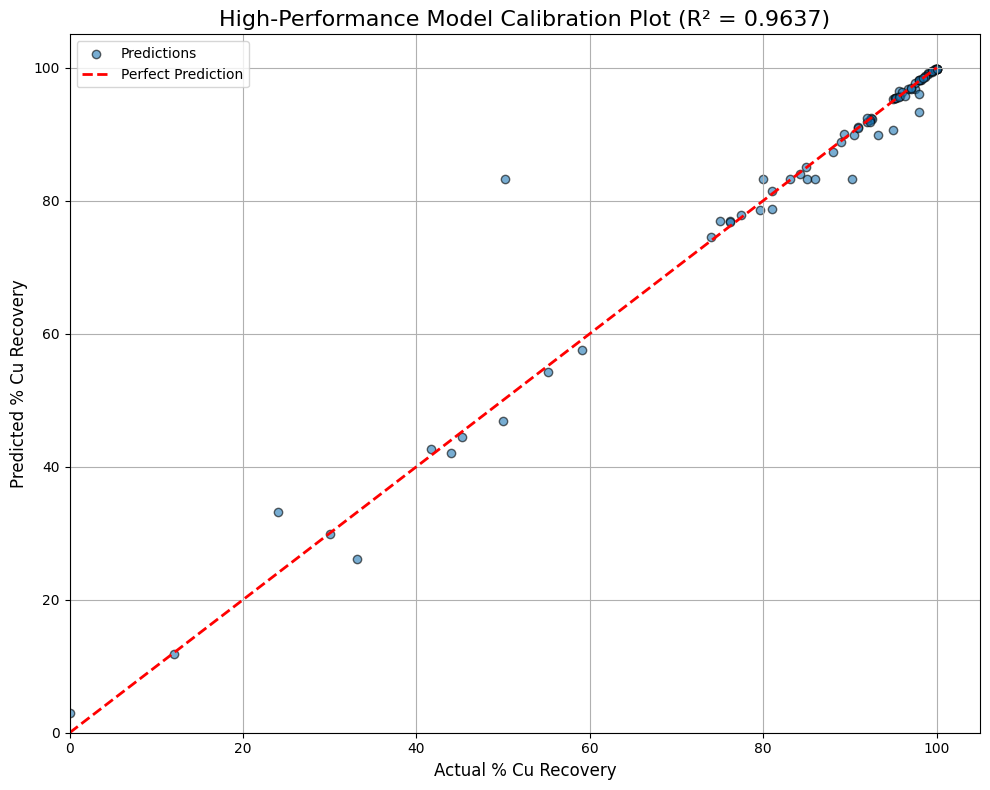

In [47]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import joblib

# Install required libraries
!pip install lightgbm catboost -q


warnings.filterwarnings('ignore')

# Scikit-learn imports
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

# XGBoost and LightGBM imports
import xgboost as xgb
import lightgbm as lgb


print("Step 1: Recreating the exact dataset used for training ")
file_path = '/kaggle/input/dataset/datset_final.xlsx'
df = pd.read_excel(file_path)

# Perform the cleaning steps
if '% Cu Recovery' in df.columns:
    df['% Cu Recovery'] = df['% Cu Recovery'].replace('<0.01', 0.0)
for col in ['Pulp density (g/L)', '% Cu Recovery']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Apply Final Tuned KNN Imputation (k=3)
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
final_knn_imputer = KNNImputer(n_neighbors=3)
df_knn_scaled = pd.DataFrame(final_knn_imputer.fit_transform(df_scaled), columns=df.columns)
df_imputed = pd.DataFrame(scaler.inverse_transform(df_knn_scaled), columns=df.columns)
X = df_imputed.drop('% Cu Recovery', axis=1)
y = df_imputed['% Cu Recovery']

# Define and train the exact same base models to recreate features
base_models = {
    'RandomForest': RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1),
    'XGBoost': xgb.XGBRegressor(n_estimators=500, random_state=42, n_jobs=-1, tree_method='hist', device='cuda'),
    'LightGBM': lgb.LGBMRegressor(n_estimators=500, random_state=42, n_jobs=-1),
    'Ridge': make_pipeline(StandardScaler(), RidgeCV())
}
oof_preds = np.zeros((len(X), len(base_models)))
for i, (model_name, model) in enumerate(base_models.items()):
    model.fit(X, y)
    oof_preds[:, i] = model.predict(X)

oof_feature_names = [f'oof_{name}' for name in base_models.keys()]
X_blended = pd.DataFrame(np.concatenate([X.values, oof_preds], axis=1), 
                         columns=list(X.columns) + oof_feature_names)
print("Data preparation complete.")


#  2. Load the Saved Model and Make Predictions 
print(" Step 2: Loading Saved Model and Making Predictions ")
model_filename = 'final_blended_model.joblib'
try:
    meta_model = joblib.load(model_filename)
    print(f"Model '{model_filename}' loaded successfully.")
except FileNotFoundError:
    print(f"ERROR: Model file '{model_filename}' not found. Please run the training script first.")
    exit()

# Split the blended data to get the same test set
_, X_test_blend, _, y_test = train_test_split(X_blended, y, test_size=0.2, random_state=42)

# Make predictions
y_pred = meta_model.predict(X_test_blend)
y_pred_clipped = np.clip(y_pred, 0, 100)
print("Predictions generated.")


#  3. Generate the Calibration Plot 
print(" Step 3: Generating Model Calibration Plot ")

# Calculate R² score to display on the plot
r2 = r2_score(y_test, y_pred_clipped)

# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_clipped, alpha=0.6, edgecolors='k', label='Predictions')

# Add the perfect prediction line
min_val = 0
max_val = 100 
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual % Cu Recovery', fontsize=12)
plt.ylabel('Predicted % Cu Recovery', fontsize=12)
plt.title(f'High-Performance Model Calibration Plot (R² = {r2:.4f})', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xlim(0, 105)
plt.ylim(0, 105)

# Save the plot
plt.savefig('best_model_calibration_plot.png', dpi=300)
print("Calibration plot saved as 'best_model_calibration_plot.png'")
plt.show()



In [48]:
import pandas as pd
import numpy as np
import warnings

# General warning filter to suppress all warnings for a cleaner output
warnings.filterwarnings('ignore')

# Scikit-learn imports
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

#  1. Load, Clean, and Impute Data 
print(" Step 1: Loading and Preparing Data ")
file_path = '/kaggle/input/dataset/datset_final.xlsx'
df = pd.read_excel(file_path)

# Perform the cleaning steps
if '% Cu Recovery' in df.columns:
    df['% Cu Recovery'] = df['% Cu Recovery'].replace('<0.01', 0.0)
for col in ['Pulp density (g/L)', '% Cu Recovery']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Apply Final Tuned KNN Imputation (k=3)
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
final_knn_imputer = KNNImputer(n_neighbors=3)
df_knn_scaled = pd.DataFrame(final_knn_imputer.fit_transform(df_scaled), columns=df.columns)
df_imputed = pd.DataFrame(scaler.inverse_transform(df_knn_scaled), columns=df.columns)
print("Data preparation complete.")


#  2. Find and Display Top 5 Rows for Maximum Recovery 
print(" Step 2: Finding Top 5 Conditions for Maximum Copper Recovery ")

# Sort the imputed dataframe by '% Cu Recovery' in descending order
top_5_recovery = df_imputed.sort_values(by='% Cu Recovery', ascending=False).head(5)

# Display the top 5 rows, rounded for clarity
print("Top 5 rows with the highest '% Cu Recovery':")
print(top_5_recovery.round(2))




 Step 1: Loading and Preparing Data 
Data preparation complete.
 Step 2: Finding Top 5 Conditions for Maximum Copper Recovery 
Top 5 rows with the highest '% Cu Recovery':
      pKa  Particle size (mm)  Acid concentration (M)  Cu in feed (%)  \
83  -1.40                 0.5                    1.50           32.50   
84  -1.40                 0.5                    2.00           32.50   
85  -1.40                 0.5                    2.50           32.50   
89  -1.40                 0.1                    4.50           35.70   
310  9.25                 1.0                    2.33           21.83   

     Temperature (°C)  Leaching time (min)  Pulp density (g/L)  \
83               75.0                240.0               66.67   
84               75.0                240.0               50.00   
85               75.0                240.0               50.00   
89               85.0                360.0               60.00   
310             100.0                300.0               20

--- Step 1: Recreating the exact dataset used for training ---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 300
[LightGBM] [Info] Number of data points in the train set: 382, number of used features: 8
[LightGBM] [Info] Start training from score 84.196578
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

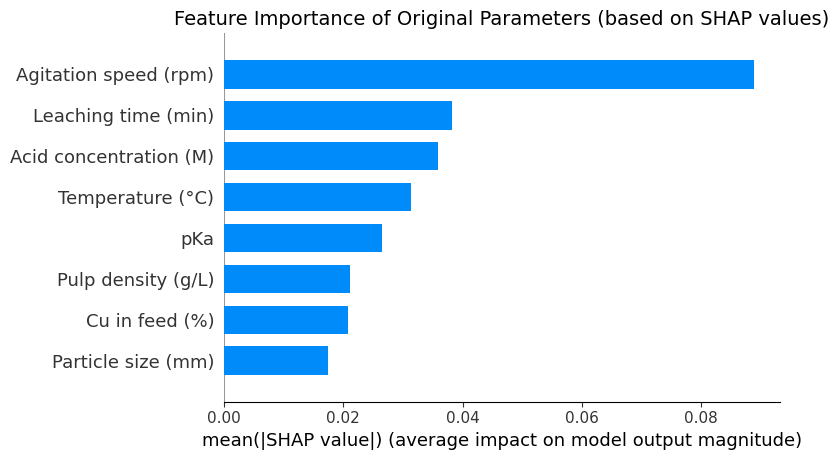


Filtered SHAP detailed summary plot saved as 'shap_summary_detailed_plot_original_features.png'


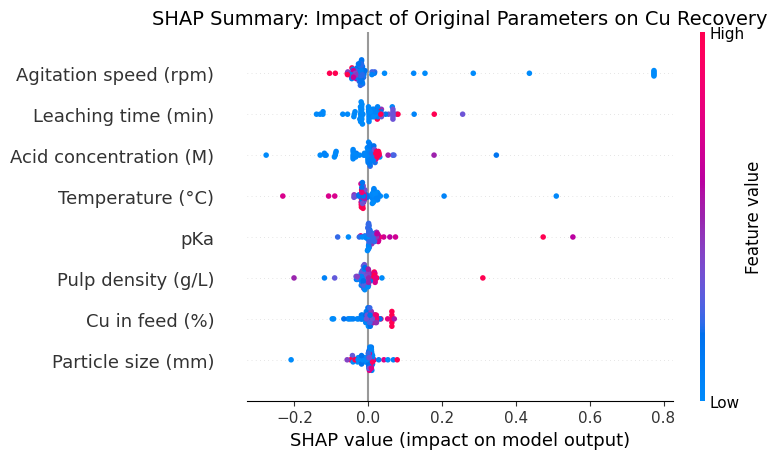


--- All tasks complete! ---


In [49]:
import pandas as pd
import numpy as np
import warnings
import joblib
import matplotlib.pyplot as plt

!pip install lightgbm catboost shap -q --user

warnings.filterwarnings('ignore')

# Import necessary modules from scikit-learn, XGBoost, LightGBM, and SHAP
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
import xgboost as xgb
import lightgbm as lgb
import shap

print("--- Step 1: Recreating the exact dataset used for training ---")
file_path = '/kaggle/input/dataset/datset_final.xlsx'
df = pd.read_excel(file_path)

# Clean the data by handling non-numeric values
if '% Cu Recovery' in df.columns:
    df['% Cu Recovery'] = df['% Cu Recovery'].replace('<0.01', 0.0)
for col in ['Pulp density (g/L)', '% Cu Recovery']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Scale and impute missing values using KNNImputer
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
final_knn_imputer = KNNImputer(n_neighbors=3)
df_knn_scaled = pd.DataFrame(final_knn_imputer.fit_transform(df_scaled), columns=df.columns)
df_imputed = pd.DataFrame(scaler.inverse_transform(df_knn_scaled), columns=df.columns)
X = df_imputed.drop('% Cu Recovery', axis=1)
y = df_imputed['% Cu Recovery']

# Define the base models used in the original blending process
base_models = {
    'RandomForest': RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1),
    'XGBoost': xgb.XGBRegressor(n_estimators=500, random_state=42, n_jobs=-1, tree_method='hist', device='cuda'),
    'LightGBM': lgb.LGBMRegressor(n_estimators=500, random_state=42, n_jobs=-1),
    'Ridge': make_pipeline(StandardScaler(), RidgeCV())
}

# Generate out-of-fold predictions from the base models
oof_preds = np.zeros((len(X), len(base_models)))
for i, (model_name, model) in enumerate(base_models.items()):
    model.fit(X, y)
    oof_preds[:, i] = model.predict(X)

# Combine original features with the out-of-fold predictions
oof_feature_names = [f'oof_{name}' for name in base_models.keys()]
X_blended = pd.DataFrame(np.concatenate([X.values, oof_preds], axis=1),
                         columns=list(X.columns) + oof_feature_names)
print("Data preparation complete.")
print("\n" + "="*50 + "\n")

# --- 2. Load the Saved Model ---
print("--- Step 2: Loading the Saved Meta-Model ---")
model_filename = 'final_blended_model.joblib'
try:
    meta_model = joblib.load(model_filename)
    print(f"Model '{model_filename}' loaded successfully.")
except FileNotFoundError:
    print(f"ERROR: Model file '{model_filename}' not found. Please run the training script first.")
    exit()
print("\n" + "="*50 + "\n")

# --- 3. Calculate SHAP Values ---
print("--- Step 3: Calculating SHAP values to explain model predictions ---")
_, X_test_blend, _, _ = train_test_split(X_blended, y, test_size=0.2, random_state=42)

explainer = shap.Explainer(meta_model)
shap_values = explainer(X_test_blend)
print("SHAP values calculated successfully.")
print("\n" + "="*50 + "\n")

# --- 4. Generate and Save SHAP Summary Plots (Filtered to Original Features) ---
print("--- Step 4: Generating and Saving SHAP Plots for Original Dataset Features Only ---")

# Get the names of the original features from the initial dataframe 'X'
original_feature_names = list(X.columns)

# Filter the SHAP values object and the test set to only include the original features
filtered_shap_values = shap_values[:, original_feature_names]
filtered_X_test = X_test_blend[original_feature_names]


# Plot 1: SHAP Bar Chart (Overall Feature Importance)
plt.figure()
shap.summary_plot(filtered_shap_values, filtered_X_test, plot_type="bar", show=False)
plt.title('Feature Importance of Original Parameters (based on SHAP values)', fontsize=14)
plt.tight_layout()
plt.savefig('shap_summary_bar_plot_original_features.png', dpi=300)
print("Filtered SHAP bar plot saved as 'shap_summary_bar_plot_original_features.png'")
plt.show()

# Plot 2: SHAP Summary Plot (Detailed Feature Impact)
plt.figure()
shap.summary_plot(filtered_shap_values, filtered_X_test, show=False)
plt.title('SHAP Summary: Impact of Original Parameters on Cu Recovery', fontsize=14)
plt.tight_layout()
plt.savefig('shap_summary_detailed_plot_original_features.png', dpi=300)
print("\nFiltered SHAP detailed summary plot saved as 'shap_summary_detailed_plot_original_features.png'")
plt.show()

print("\n--- All tasks complete! ---")


In [17]:
import pandas as pd
import numpy as np
import warnings
import joblib

# Install required libraries if they are not already installed
!pip install lightgbm catboost -q

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Import necessary modules from scikit-learn, XGBoost, and LightGBM
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
import xgboost as xgb
import lightgbm as lgb

# --- 1. Recreate the Dataset Used for Training ---
print("--- Step 1: Recreating the exact dataset used for training ---")
try:
    file_path = '/kaggle/input/dataset/datset_final.xlsx'
    df = pd.read_excel(file_path)
except FileNotFoundError:
    print(f"ERROR: Dataset file not found at '{file_path}'. Please check the path.")
    exit()

# Clean the data by handling non-numeric values
if '% Cu Recovery' in df.columns:
    df['% Cu Recovery'] = df['% Cu Recovery'].replace('<0.01', 0.0)
for col in ['Pulp density (g/L)', '% Cu Recovery']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Scale and impute missing values using KNNImputer
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
final_knn_imputer = KNNImputer(n_neighbors=3)
df_knn_scaled = pd.DataFrame(final_knn_imputer.fit_transform(df_scaled), columns=df.columns)
df_imputed = pd.DataFrame(scaler.inverse_transform(df_knn_scaled), columns=df.columns)

X = df_imputed.drop('% Cu Recovery', axis=1)
y = df_imputed['% Cu Recovery']

# Define the base models used in the original blending process
# This is necessary to generate the features the meta-model was trained on.
base_models = {
    'RandomForest': RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1),
    'XGBoost': xgb.XGBRegressor(n_estimators=500, random_state=42, n_jobs=-1, tree_method='hist', device='cuda'),
    'LightGBM': lgb.LGBMRegressor(n_estimators=500, random_state=42, n_jobs=-1),
    'Ridge': make_pipeline(StandardScaler(), RidgeCV())
}

# Generate out-of-fold predictions from the base models
oof_preds = np.zeros((len(X), len(base_models)))
print("Generating base model predictions to create features for the meta-model...")
for i, (model_name, model) in enumerate(base_models.items()):
    model.fit(X, y)
    oof_preds[:, i] = model.predict(X)

# Combine original features with the out-of-fold predictions
oof_feature_names = [f'oof_{name}' for name in base_models.keys()]
X_blended = pd.DataFrame(np.concatenate([X.values, oof_preds], axis=1),
                         columns=list(X.columns) + oof_feature_names)
print("Data preparation complete.")
print("\n" + "="*50 + "\n")


# --- 2. Load the Saved Model and Make Predictions on the Full Dataset ---
print("--- Step 2: Loading Saved Model and Predicting on Full Dataset ---")
model_filename = 'final_blended_model.joblib'
try:
    meta_model = joblib.load(model_filename)
    print(f"Model '{model_filename}' loaded successfully.")
except FileNotFoundError:
    print(f"ERROR: Model file '{model_filename}' not found. Please run the training script first.")
    exit()

# Predict on the entire blended dataset
full_dataset_predictions = meta_model.predict(X_blended)
full_dataset_predictions_clipped = np.clip(full_dataset_predictions, 0, 100)

# Add predictions to the original imputed dataframe
df_imputed['Predicted % Cu Recovery'] = full_dataset_predictions_clipped
print("Predictions generated for the entire dataset.")
print("\n" + "="*50 + "\n")


# --- 3. Identify and Display Optimal Conditions ---
print("--- Step 3: Finding Optimal Conditions for >95% Recovery ---")

# Filter for rows where predicted recovery is > 95%
high_recovery_df = df_imputed[df_imputed['Predicted % Cu Recovery'] > 95].copy()

if high_recovery_df.empty:
    print("No operating conditions found that are predicted to yield >95% recovery.")
else:
    # We are interested in the input conditions, so drop the recovery columns
    optimal_conditions = high_recovery_df.drop(columns=['% Cu Recovery', 'Predicted % Cu Recovery'])

    # Calculate the average (mean) of these optimal conditions
    average_optimal_conditions = optimal_conditions.mean()

    print("Analysis complete. Found {} data points with predicted recovery > 95%.".format(len(high_recovery_df)))
    print("\n--- Average Operating Conditions for >95% Copper Recovery ---")
    print(average_optimal_conditions.round(2).to_string())

print("\n--- All tasks complete! ---")

--- Step 1: Recreating the exact dataset used for training ---
Generating base model predictions to create features for the meta-model...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 300
[LightGBM] [Info] Number of data points in the train set: 382, number of used features: 8
[LightGBM] [Info] Start training from score 84.196578
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [19]:
import pandas as pd
import numpy as np
import warnings
import joblib
from typing import List

# Suppress warnings
warnings.filterwarnings('ignore')

# Required ML libraries
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
import xgboost as xgb
import lightgbm as lgb

# --- CONFIGURATION ---
FILE_PATH = '/kaggle/input/dataset/datset_final.xlsx'
MODEL_PATH = 'final_blended_model.joblib'
TARGET_COLUMN = '% Cu Recovery'
RECOVERY_THRESHOLD = 90.0

# --- ❗ ACTION REQUIRED: Define resource columns to minimize ---
RESOURCE_COLUMNS_TO_MINIMIZE = [
    # 'Pulp density (g/L)',
    # 'Reagent_Dosage_A',
    # 'Grinding_Energy_kWh'
]

def find_optimal_configuration():
    """
    Main function to load data, run predictions, and find the most
    resource-efficient configuration for high copper recovery.
    """
    # 1. Load and Prepare Data
    print("--- Step 1: Loading and Preparing Data ---")
    try:
        df = pd.read_excel(FILE_PATH)
    except FileNotFoundError:
        print(f"ERROR: Dataset file not found at '{FILE_PATH}'.")
        return

    if TARGET_COLUMN in df.columns:
        df[TARGET_COLUMN] = pd.to_numeric(df[TARGET_COLUMN].replace('<0.01', 0.0), errors='coerce')
    if 'Pulp density (g/L)' in df.columns:
        df['Pulp density (g/L)'] = pd.to_numeric(df['Pulp density (g/L)'], errors='coerce')

    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    imputer = KNNImputer(n_neighbors=3)
    df_imputed_scaled = pd.DataFrame(imputer.fit_transform(df_scaled), columns=df.columns)
    df_imputed = pd.DataFrame(scaler.inverse_transform(df_imputed_scaled), columns=df.columns)

    X = df_imputed.drop(TARGET_COLUMN, axis=1)
    y = df_imputed[TARGET_COLUMN]

    # 2. Recreate Blended Features
    print("\n--- Step 2: Recreating Blended Features for Model ---")
    base_models = {
        'RandomForest': RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1),
        'XGBoost': xgb.XGBRegressor(n_estimators=500, random_state=42, n_jobs=-1, tree_method='hist', device='cuda'),
        'LightGBM': lgb.LGBMRegressor(n_estimators=500, random_state=42, n_jobs=-1),
        'Ridge': make_pipeline(StandardScaler(), RidgeCV())
    }
    
    oof_preds = np.zeros((len(X), len(base_models)))
    for i, (name, model) in enumerate(base_models.items()):
        model.fit(X, y)
        oof_preds[:, i] = model.predict(X)
        
    oof_feature_names = [f'oof_{name}' for name in base_models.keys()]
    X_blended = pd.DataFrame(np.concatenate([X.values, oof_preds], axis=1),
                             columns=list(X.columns) + oof_feature_names)

    # 3. Load Model and Predict
    print(f"\n--- Step 3: Loading Model and Making Predictions ---")
    try:
        meta_model = joblib.load(MODEL_PATH)
    except FileNotFoundError:
        print(f"ERROR: Model file '{MODEL_PATH}' not found. Please run the training script first.")
        return

    full_predictions = np.clip(meta_model.predict(X_blended), 0, 100)
    
    # 4. Find and Display Optimal Configuration
    print("\n--- Step 4: Identifying Optimal Configuration ---")
    results_df = df_imputed.copy()
    results_df['Predicted_Recovery'] = full_predictions
    high_recovery_df = results_df[results_df['Predicted_Recovery'] > RECOVERY_THRESHOLD].copy()

    if high_recovery_df.empty:
        print(f"No configurations found predicted to achieve > {RECOVERY_THRESHOLD}% recovery.")
        return

    existing_resource_columns = [col for col in RESOURCE_COLUMNS_TO_MINIMIZE if col in high_recovery_df.columns]

    if not existing_resource_columns:
        print("WARNING: No resource columns defined. Displaying configuration with highest recovery.")
        optimal_config = high_recovery_df.loc[high_recovery_df['Predicted_Recovery'].idxmax()]
    else:
        print(f"Optimizing to minimize resource usage from: {existing_resource_columns}")
        resource_scaler = MinMaxScaler()
        high_recovery_df['Resource_Score'] = resource_scaler.fit_transform(high_recovery_df[existing_resource_columns]).sum(axis=1)
        optimal_config = high_recovery_df.loc[high_recovery_df['Resource_Score'].idxmin()]

    print("\nOptimal Configuration Found:")
    print(f"Configuration predicted for >{RECOVERY_THRESHOLD}% recovery with minimal resource use:")
    print(optimal_config.round(2).to_frame().T)


if __name__ == "__main__":
    find_optimal_configuration()
    print("\nScript complete!")


--- Step 1: Loading and Preparing Data ---

--- Step 2: Recreating Blended Features for Model ---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 300
[LightGBM] [Info] Number of data points in the train set: 382, number of used features: 8
[LightGBM] [Info] Start training from score 84.196578
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

In [21]:
import pandas as pd
import numpy as np
import warnings
import joblib
from typing import List

# Suppress warnings
warnings.filterwarnings('ignore')

# Required ML libraries
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
import xgboost as xgb
import lightgbm as lgb

# --- CONFIGURATION ---
FILE_PATH = '/kaggle/input/dataset/datset_final.xlsx'
MODEL_PATH = 'final_blended_model.joblib'
TARGET_COLUMN = '% Cu Recovery'
RECOVERY_THRESHOLD = 90.0

# --- Constraint columns to evaluate ---
# The script will find the best scenario (>90% recovery) for each column listed here.
CONSTRAINT_COLUMNS_TO_EVALUATE = [
    'Temperature (°C)',
    'Acid concentration (M)',
    'Leaching time (min)'
]

def find_top_scenarios_with_constraints():
    """
    Main function to load data, run predictions, and find top recovery
    scenarios, each optimized for a specific resource constraint.
    """
    # 1. Load and Prepare Data
    print("--- Step 1: Loading and Preparing Data ---")
    try:
        df = pd.read_excel(FILE_PATH)
    except FileNotFoundError:
        print(f"ERROR: Dataset file not found at '{FILE_PATH}'.")
        return

    if TARGET_COLUMN in df.columns:
        df[TARGET_COLUMN] = pd.to_numeric(df[TARGET_COLUMN].replace('<0.01', 0.0), errors='coerce')
    if 'Pulp density (g/L)' in df.columns:
        df['Pulp density (g/L)'] = pd.to_numeric(df['Pulp density (g/L)'], errors='coerce')

    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    imputer = KNNImputer(n_neighbors=3)
    df_imputed_scaled = pd.DataFrame(imputer.fit_transform(df_scaled), columns=df.columns)
    df_imputed = pd.DataFrame(scaler.inverse_transform(df_imputed_scaled), columns=df.columns)

    X = df_imputed.drop(TARGET_COLUMN, axis=1)
    y = df_imputed[TARGET_COLUMN]

    # 2. Recreate Blended Features
    print("\n--- Step 2: Recreating Blended Features for Model ---")
    base_models = {
        'RandomForest': RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1),
        'XGBoost': xgb.XGBRegressor(n_estimators=500, random_state=42, n_jobs=-1, tree_method='hist', device='cuda'),
        'LightGBM': lgb.LGBMRegressor(n_estimators=500, random_state=42, n_jobs=-1),
        'Ridge': make_pipeline(StandardScaler(), RidgeCV())
    }
    
    oof_preds = np.zeros((len(X), len(base_models)))
    for i, (name, model) in enumerate(base_models.items()):
        model.fit(X, y)
        oof_preds[:, i] = model.predict(X)
        
    oof_feature_names = [f'oof_{name}' for name in base_models.keys()]
    X_blended = pd.DataFrame(np.concatenate([X.values, oof_preds], axis=1),
                             columns=list(X.columns) + oof_feature_names)

    # 3. Load Model and Predict
    print(f"\n--- Step 3: Loading Model and Making Predictions ---")
    try:
        meta_model = joblib.load(MODEL_PATH)
    except FileNotFoundError:
        print(f"ERROR: Model file '{MODEL_PATH}' not found. Please run the training script first.")
        return

    full_predictions = np.clip(meta_model.predict(X_blended), 0, 100)
    
    # 4. Find and Display Top Scenarios with Constraints
    print("\n--- Step 4: Identifying Top Scenarios with Constraints ---")
    results_df = df_imputed.copy()
    results_df['Predicted_Recovery'] = full_predictions
    high_recovery_df = results_df[results_df['Predicted_Recovery'] > RECOVERY_THRESHOLD].copy()

    if high_recovery_df.empty:
        print(f"No configurations found predicted to achieve > {RECOVERY_THRESHOLD}% recovery.")
        return

    existing_constraint_columns = [col for col in CONSTRAINT_COLUMNS_TO_EVALUATE if col in high_recovery_df.columns]

    if not existing_constraint_columns:
        print("WARNING: No constraint columns defined. Displaying single configuration with highest recovery.")
        optimal_config = high_recovery_df.loc[high_recovery_df['Predicted_Recovery'].idxmax()]
        print(optimal_config.round(2).to_frame().T)
    else:
        top_scenarios = []
        for col in existing_constraint_columns:
            # Find the row that minimizes the current constraint column
            optimal_row = high_recovery_df.loc[high_recovery_df[col].idxmin()]
            scenario = optimal_row.to_frame().T
            scenario['Constraint_Optimized'] = f"Lowest {col}"
            top_scenarios.append(scenario)

        if top_scenarios:
            summary_df = pd.concat(top_scenarios, ignore_index=True)
            # Reorder columns for better readability
            cols = ['Constraint_Optimized', 'Predicted_Recovery'] + [c for c in summary_df.columns if c not in ['Constraint_Optimized', 'Predicted_Recovery']]
            summary_df = summary_df[cols]
            
            print("\nTop Recovery Scenarios Found:")
            print(f"Each scenario below is predicted for >{RECOVERY_THRESHOLD}% recovery while minimizing a specific constraint:")
            print(summary_df.round(2))
        else:
             print("Could not determine optimal scenarios for the given constraints.")


if __name__ == "__main__":
    find_top_scenarios_with_constraints()
    print("\nScript complete!")


--- Step 1: Loading and Preparing Data ---

--- Step 2: Recreating Blended Features for Model ---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 300
[LightGBM] [Info] Number of data points in the train set: 382, number of used features: 8
[LightGBM] [Info] Start training from score 84.196578
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

--- Step 1: Loading and Preparing Data ---

--- Step 2: Recreating Blended Features for Model ---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 300
[LightGBM] [Info] Number of data points in the train set: 382, number of used features: 8
[LightGBM] [Info] Start training from score 84.196578
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

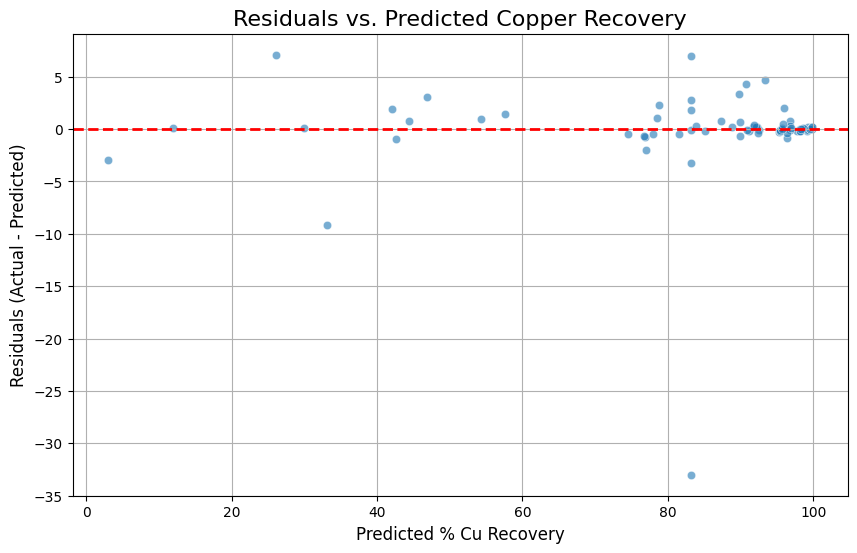

Residual plot saved as 'residual_plot.png'

--- Step 5: Generating Feature Importance Plot for Original Features ---


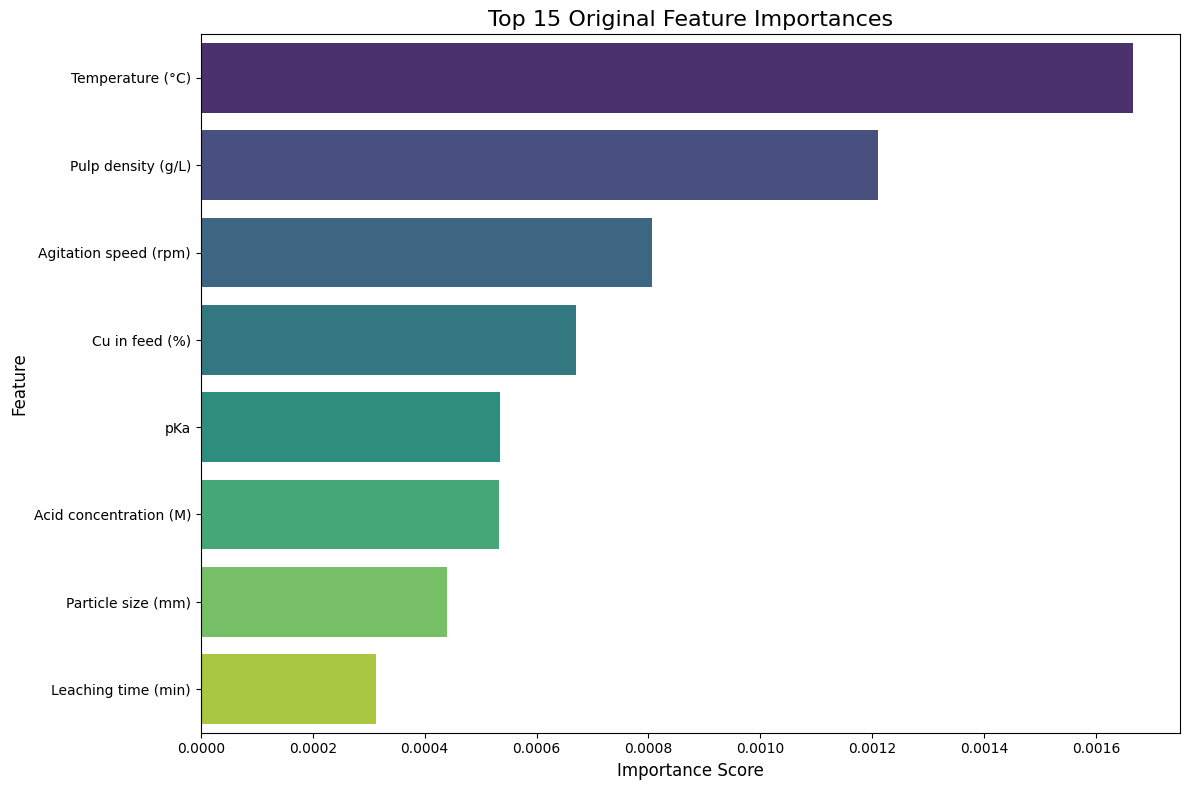

Original feature importance plot saved as 'original_feature_importance_plot.png'

Script complete!


In [23]:
import pandas as pd
import numpy as np
import warnings
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
warnings.filterwarnings('ignore')

# Required ML libraries
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
import xgboost as xgb
import lightgbm as lgb

# --- CONFIGURATION ---
FILE_PATH = '/kaggle/input/dataset/datset_final.xlsx'
MODEL_PATH = 'final_blended_model.joblib'
TARGET_COLUMN = '% Cu Recovery'

def create_evaluation_plots():
    """
    Main function to load the trained model and generate a Residual Plot
    and a Feature Importance Plot.
    """
    # 1. Load and Prepare Data
    print("--- Step 1: Loading and Preparing Data ---")
    try:
        df = pd.read_excel(FILE_PATH)
    except FileNotFoundError:
        print(f"ERROR: Dataset file not found at '{FILE_PATH}'.")
        return

    if TARGET_COLUMN in df.columns:
        df[TARGET_COLUMN] = pd.to_numeric(df[TARGET_COLUMN].replace('<0.01', 0.0), errors='coerce')
    if 'Pulp density (g/L)' in df.columns:
        df['Pulp density (g/L)'] = pd.to_numeric(df['Pulp density (g/L)'], errors='coerce')

    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    imputer = KNNImputer(n_neighbors=3)
    df_imputed_scaled = pd.DataFrame(imputer.fit_transform(df_scaled), columns=df.columns)
    df_imputed = pd.DataFrame(scaler.inverse_transform(df_imputed_scaled), columns=df.columns)

    X = df_imputed.drop(TARGET_COLUMN, axis=1)
    y = df_imputed[TARGET_COLUMN]
    original_features = X.columns.tolist() # Store original feature names

    # 2. Recreate Blended Features
    print("\n--- Step 2: Recreating Blended Features for Model ---")
    base_models = {
        'RandomForest': RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1),
        'XGBoost': xgb.XGBRegressor(n_estimators=500, random_state=42, n_jobs=-1, tree_method='hist', device='cuda'),
        'LightGBM': lgb.LGBMRegressor(n_estimators=500, random_state=42, n_jobs=-1),
        'Ridge': make_pipeline(StandardScaler(), RidgeCV())
    }
    
    oof_preds = np.zeros((len(X), len(base_models)))
    for i, (name, model) in enumerate(base_models.items()):
        model.fit(X, y)
        oof_preds[:, i] = model.predict(X)
        
    oof_feature_names = [f'oof_{name}' for name in base_models.keys()]
    X_blended = pd.DataFrame(np.concatenate([X.values, oof_preds], axis=1),
                             columns=list(X.columns) + oof_feature_names)

    # 3. Load Model and Get Test Set Predictions
    print(f"\n--- Step 3: Loading Model and Getting Test Predictions ---")
    try:
        meta_model = joblib.load(MODEL_PATH)
    except FileNotFoundError:
        print(f"ERROR: Model file '{MODEL_PATH}' not found. Please run the training script first.")
        return

    # Split data to get a test set for evaluation
    X_train, X_test, y_train, y_test = train_test_split(X_blended, y, test_size=0.2, random_state=42)
    y_pred = np.clip(meta_model.predict(X_test), 0, 100)
    
    # 4. Generate and Save Residual Plot
    print("\n--- Step 4: Generating Residual Plot ---")
    residuals = y_test - y_pred
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--', lw=2)
    plt.title('Residuals vs. Predicted Copper Recovery', fontsize=16)
    plt.xlabel('Predicted % Cu Recovery', fontsize=12)
    plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
    plt.grid(True)
    plt.savefig('residual_plot.png', dpi=300)
    plt.show()
    print("Residual plot saved as 'residual_plot.png'")

    # 5. Generate and Save Feature Importance Plot (Original Features Only)
    print("\n--- Step 5: Generating Feature Importance Plot for Original Features ---")
    all_feature_importances = pd.DataFrame({
        'feature': X_blended.columns,
        'importance': meta_model.feature_importances_
    })
    
    # Filter for original features only
    original_feature_importances = all_feature_importances[all_feature_importances['feature'].isin(original_features)]
    
    # Get the top 15 original features
    top_original_features = original_feature_importances.sort_values('importance', ascending=False).head(15)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=top_original_features, palette='viridis')
    plt.title('Top 15 Original Feature Importances', fontsize=16)
    plt.xlabel('Importance Score', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.tight_layout()
    plt.savefig('original_feature_importance_plot.png', dpi=300)
    plt.show()
    print("Original feature importance plot saved as 'original_feature_importance_plot.png'")


if __name__ == "__main__":
    create_evaluation_plots()
    print("\nScript complete!")
